**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Aprendizaje Supervisado Parte 1

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import io
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from plotnine import ggplot
from plotnine import aes, stat_bin, geom_bar, geom_histogram, geom_boxplot, coord_flip

from scipy.stats import multivariate_normal
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF
from scipy.stats import iqr # Interquartile range
from sklearn.preprocessing import PolynomialFeatures # Permite pre-procesar coeficientes de polinomios de n -orden
from sklearn.linear_model import LinearRegression  # Aplica modelos de regresión lineal para encontrar los mejores coeficientes
                                                   # de una función lineal que represente la tendencia de un conjunto de datos. 
from sklearn.model_selection import cross_val_score # Aplica un método de validación del modelo creado por regresión.
from sklearn.model_selection import train_test_split # Esta función realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis # LDA y QDA
from sklearn.naive_bayes import BernoulliNB # Bayes ingenuo Bernoulli
from sklearn.naive_bayes import MultinomialNB # Bayes ingenuo Multinomial
from sklearn.naive_bayes import GaussianNB # Bayes ingenuo Gaussiano
from sklearn.tree import DecisionTreeClassifier # Librería del árbol de decisión para tareas de clasificación de datos.
from sklearn.tree import plot_tree # Graficar el árbol de decisión
from sklearn.linear_model import LogisticRegression # Regresión Logística
from sklearn.svm import LinearSVC # Librería de la máquina de soporte vectorial con una función Kernel lineal
from sklearn.svm import SVC # Máquina de Soporte Vectorial con funciones Kernel no lineal
from sklearn.svm import OneClassSVM # One-Class SVM para detectar datos atípicos

## ¿Qué es el aprendizaje automático o machine learning?

**El aprendizaje automático o machine learning** es un proceso autónomo que extrae un conjunto de patrones a partir de los datos. También se puede definir como la exploración y desarrollo de los modelos matemáticos para aprender a partir de los datos.



Las principales características del aprendizaje automático son:

1) Su función principal es automatizar un proceso de aprendizaje de un modelo que captura la relación entre las características y un vector de clases o etiquetas en un conjunto de datos.

NOTA: Se le llama **descriptores** a las **variables** o **características** que conforma una base de datos (por ejemplo, la columna 1 representa Temperatura, la columna 2 representa la Presión Atomosférica, etc.)

2) Los algoritmos de aprendizaje automático permiten obtener un modelo consistente que permita clasificar, predecir o agrupar correctamente los datos.

NOTA: Una **clase** es una etiqueta que representa un comportamiento o una observación de un conjunto de datos, por ejemplo, la clase 1 representa "normal", la clase 2 representa "estado crítico", la clase 3 representa "estado de alerta", etc... Por lo general, las clases se pueden manejar con valores numéricos, {1, 2, 3, ...}, o con carácteres, {"alerta", "normal",...}

3) Hay varios criterios de los algoritmos de aprendizaje automático que deben ser tenidos en cuenta cuando se usan en diferentes aplicaciones, tales como: 

3.1) Espacio de características o de descriptores

3.2) La complejidad de los algoritmos.

3.3) La naturaleza de los datos.

3.4) Los errores de aprendizaje.

3.5) Errores de estimación de los modelos.

3.6) Errores de aproximación.

3.7) Errores de optimización de los algoritmos de aprendizaje automático.

## Criterios básicos del aprendizaje automático

### Espacio de características

Representa un conjunto de datos al considerar que cada *eje de las características o desciptores* es un eje de un sistema de coordenadas. Un espacio de caracterásticas es un espacio de n-dimensiones que es creado al tener cada descriptor en un conjunto de datos un eje de sistemas de coordenadas de n-dimensiones y mapear cada una en el conjunto de datos para un punto en este sistema de coordenadas basado en los valores de sus caract

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/phoneme.dat"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Esimportante codificarlo a utf-8
display(data.head(20))

,Aa,Ao,Dcl,Iy,Sh,Class
0,1.24,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.3,1.041,0.559,0
3,0.279,0.99,2.555,-0.738,0.0,0
4,0.307,1.272,2.656,-0.946,-0.467,0
5,0.96,0.712,-0.143,0.091,-0.061,0
6,2.941,0.657,1.493,-0.331,-0.123,0
7,0.401,1.159,2.064,-0.69,-0.308,0
8,0.229,1.748,0.634,0.259,0.0,0
9,0.303,0.609,0.474,1.427,-0.811,1


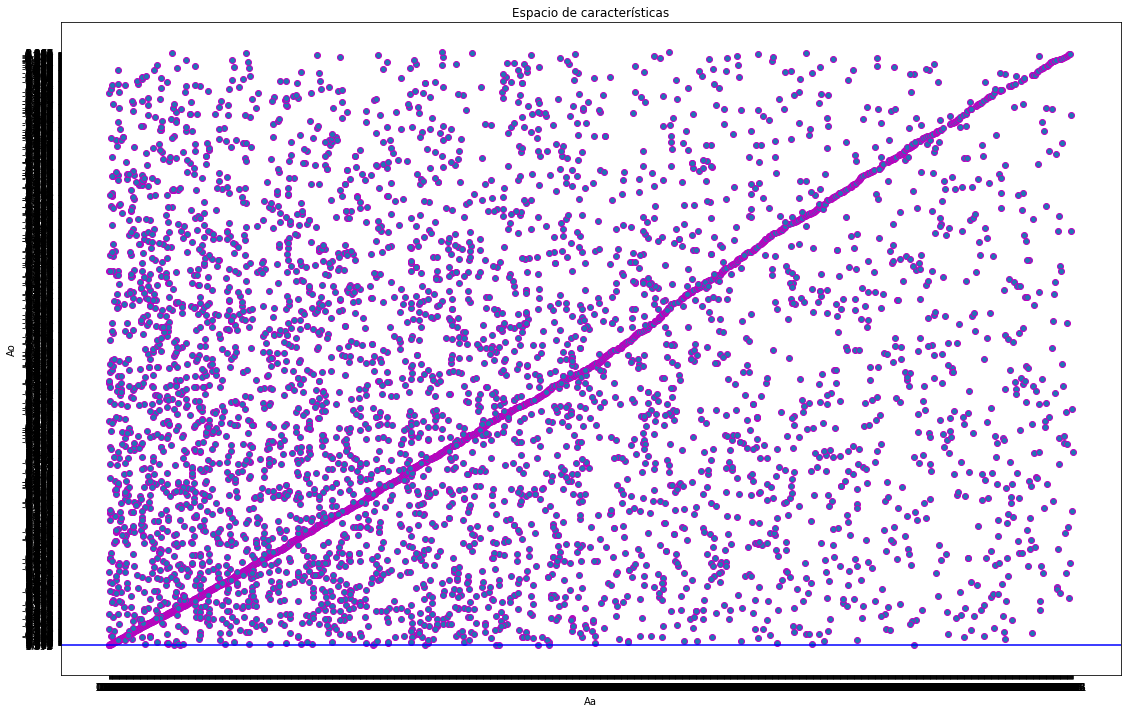

In [ ]:
fig = plt.figure(figsize=(19,12)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(data['Aa'], data[' Ao'], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Espacio de características') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y
plt.show() # Mostrar figu

### Complejidad de los algoritmos

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Complejidad.svg" width="1500"/>
</div>


In [ ]:
# Se unos valores iniciales de una función polinímica, f(x1,...,xn) = a1*x1 + a2*x2 +...+ an*xn

coeficientes = [1, 4, 25] # Se define tres conjuntos de coeficientes para observar el problema de la complejidad.

# Se define un número de muestras que nos va a permitir construir una base de datos de N muestras x D descriptores, 
# características o variables

muestras = 40

# Se crea una función que genera la función objetivo que queremos alcanzar a obtener a partir de los datos

def funcion_objetivo(x):
    return np.sin(2*np.pi*x + 0.3) + np.cos(2*np.pi*x + 0.5)

# La función objetivo es: g(x) = sen(2*pi*x + 0.3) + cos(2*pi*x + 0.5)
# Se crea un conjunto de valores del eje x

x = np.sort(np.random.rand(muestras))  # La función sort organiza de menor a mayor los valores de un conjunto de datos

# Se crea un conjunto de valores del eje y

ruido = 0.2 # Se da un valor entre 0 y un valor finito que representa el nivel de ruido de los datos
y = funcion_objetivo(x) + (np.random.randn(muestras) * ruido)

In [ ]:
# Se define las dimensiones de los gráficos resultantes de la regresión lineal con underfitting, generalización y overfitting

plt.figure(figsize=(15, 5))

for i in range(len(coeficientes)):
    ax = plt.subplot(1, len(coeficientes), i + 1) # Se genera tres graficas de acuerdo a los valores de los coeficientes
    plt.setp(ax, xticks=(), yticks=()) # Se define que elementos se van a mostrar en la figuira
    
    # Se aplica la función polinómica, para calcular la función lineal de acuerdo al número de coeficientes definidos anterior-
    # mente
    polynomial_features = PolynomialFeatures(degree=coeficientes[i], include_bias=False) 
    
    # Se construye un modelo de regresión lineal
    
    linear_regression = LinearRegression()
    
    # Se construye un pipeline para integrar dos cadenas de modelos en uno solo
    
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y) # Se linealiza la función a partir de los valores de x e y

    # Se evalua el desempeño del modelo construido con una crossvalidation (lo veremos más adelante)
    scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    # En este caso, se selecciona aleatoriamente 10 elementos de la base de datos de los resultados del modelo de regresión
    # lineal, cv = 10, y se realiza una comparación entre los datos del modelo con los datos de la función objetivo, para
    # observar si son cercanos o no. Para eso, se aplica el error cuadrático medio entre los datos de y del modelo obtenido
    # y los datos de y de los datos originales.
    
    # Se gráfica los resultados finales 
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Modelo")
    plt.plot(x_test, funcion_objetivo(x_test), label="Funcion Objetivo")
    plt.scatter(x, y, edgecolor='m', s=20, label="Muestras")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best") # Localiza las leyendas de cada gráfica en la mejor posición (en este caso, Modelo, Función Objetivo
                           # y Muestras)
    plt.title("Coeficientes {}\nMSE = {:.2e}(+/- {:.2e})".format(coeficientes[i], -scores.mean(), scores.std()))
plt.show()

### La naturaleza de los datos

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/ComplejidadDATOS.svg" width="1500"/>
</div>

### Errores del aprendizaje automático

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/ERRORES.svg" width="1500"/>
</div>

### Errores de estimación de los modelos.

Son errores que ocurren cuando hay diferencias entre el modelo obtenido por un conjunto de datos y el vector objetivo conocido desde la base de datos. Este tipo de error esta relacionado por los diferentes tamaños de los datos y la tasa de datos atípicos.

### Errores de aproximación

Son errores que se presentan por la diferencia entre los modelos derivados del algoritmo de aprendizaje automático, el cual contiene un conjunto de parámetros. En este caso, el error de aproximación dependerá si el modelo es **lineal o no lineal**, así como la **cantidad de parámetros utilizados**. 

### Errores de optimización de los algoritmos de aprendizaje automático

Son errores que se presentan por las diferencias de los algoritmos de aprendizaje automático derivados de modelos asumidos como modelos matemáticos. Por lo general, este error es una consecuencia de ignorar variables importantes del modelo de optimización que resuleve el algoritmo de aprendizaje automático, que contienen una o más funciones objetivo y sus respectivas restricciones. También influye la velocidad de convergencia del algoritmo para encontrar un error de optimización menor a un error de umbral que define un usuario. Si la convergencia es demasiado rápida, se presenta *underfitting* pero si la convergencia es demasiado rápida, se presenta *overfitting*. Por esta razón, una convergencia de un modelo de aprendizaje automático generalizado es lo ideal para obtener el mejor resultado.

## Tipos de Aprendizaje Automático o Machine Learning

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Aprendizaje.svg" width="1500"/>
</div>

## Aprendizaje Supervisado: Tareas de Clasificación

Usualmente, si el vector de clases o etiquetas y su asignación a cada muestra u observación son conocidas en una base de datos, se puede crear un modelo de clasificación tal que al ingresar un nuevo conjunto de muestras, el modelo será capaz de asignar correctamente la clase que debe pertenecer. Para lograr este objetivo, se debe construir un modelo que **separe** los datos mediante una función de separación o de decisión, el cual permitirá distinguir aquellos datos que pertenencen a una clase con respecto a otro. Desde el punto de vista de la estadística, los modelos de clasificación ideales deben generar **fronteras bayesianas**. Dicha frontera se considera como la función de separación ideal de los datos.

Analicemos como se puede interpretar la frontera bayesiana.



### Frontera Bayesiana

Para este apartado, vamos a analizar dos distribuciones de probabilidad gaussianas que al unificar ambas funciones, se puede determinar la frontera natural de separación de los datos en clases, lo cual llamaremos la **frontera Bayesiana** o **frontera de decisión**. Este concepto es muy importante para entender el funcionamiento de los algoritmos de clasificación de datos que se utilizan en Machine Learning

In [ ]:
X = np.linspace(-3, 9, 2000)
f1 = multivariate_normal.pdf(X, mean = 0, cov = 1)
f2 = multivariate_normal.pdf(X, mean = 4, cov = 2)

In [ ]:
Frontera_Bayesiana = X[np.where(f1 < f2)] # Determinamos las posiciones donde f1 < f2. 
Frontera_Bayesiana = Frontera_Bayesiana[0] # Seleccionamos la posición [0] donde se determina la construcción de la frontera
print("Valor de x para construir la frontera Bayesiana:", Frontera_Bayesiana)

Valor de x para construir la frontera Bayesiana: 1.778389194597299


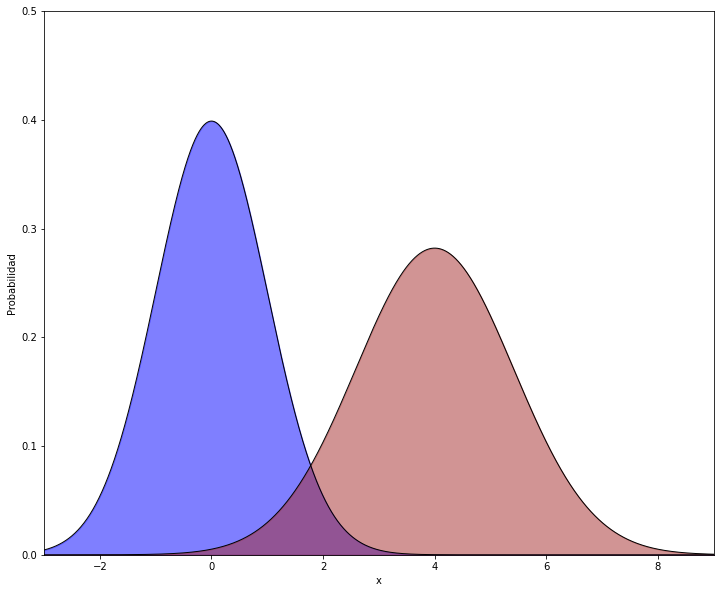

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='brown', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_xlim(-3, 9)
ax.set_ylim(0, 0.5)
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

En la intersección entre ambas funciones de probabilidad Gaussiana, definimos nuestra frontera Bayesiana

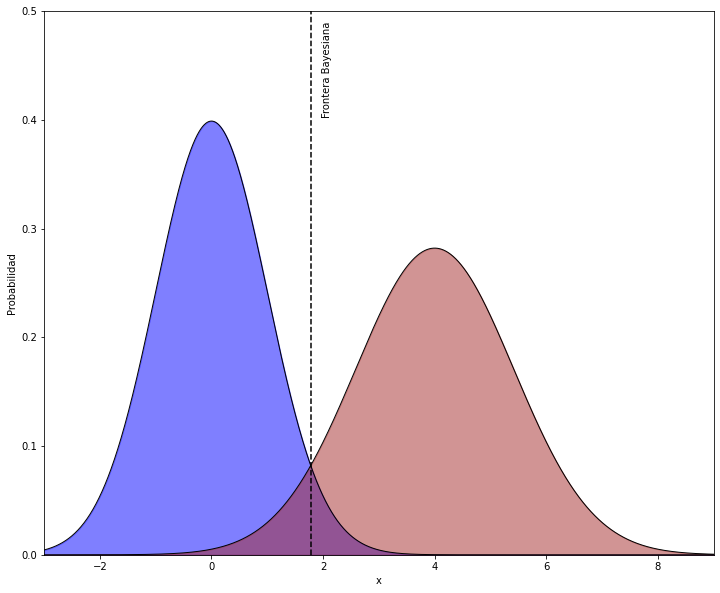

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='brown', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_xlim(-3, 9)
ax.set_ylim(0, 0.5)
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--k') # Cuando f1 y f2 son iguales, se establece la frontera de decisión
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

¿Qué comportamiento se observaría si cambiamos la condición para encontrar la frontera Bayesiana, por ejemplo, $f_1 > f_2$?

In [ ]:
Frontera_Bayesiana = X[np.where(f1 > f2)] # Determinamos las posiciones donde f1 > f2. 
Frontera_Bayesiana = Frontera_Bayesiana[0] # Seleccionamos la posición [0] donde se determina la construcción de la frontera
print("Valor de x para construir la frontera Bayesiana:", Frontera_Bayesiana)

Valor de x para construir la frontera Bayesiana: -3.0


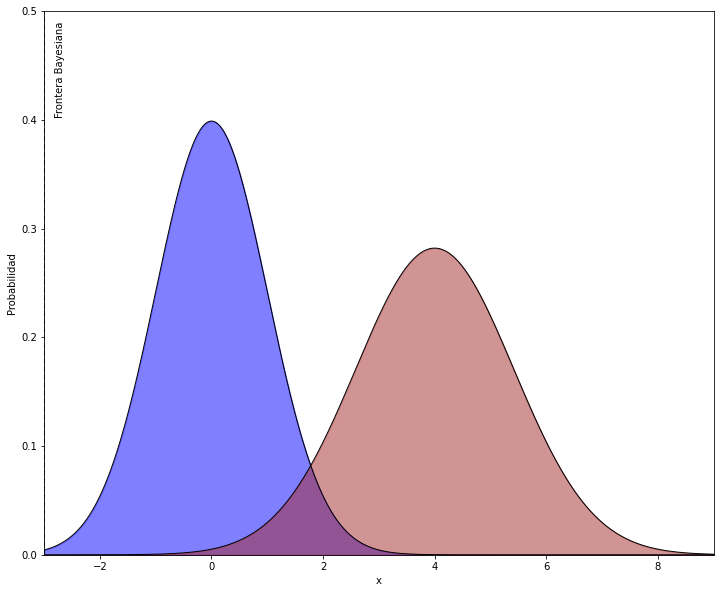

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='blue', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='brown', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_xlim(-3, 9)
ax.set_ylim(0, 0.5)
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--k') # Cuando f1 y f2 son iguales, se establece la frontera de decisión
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

¿Qué comportamiento se observaría si la media y la covarianza de $f_2$ es mayor a $f_1$?

In [ ]:
X = np.linspace(-3, 9, 2000)
f1 = multivariate_normal.pdf(X, mean = 0, cov = 1)
f2 = multivariate_normal.pdf(X, mean = 7, cov = 4)

In [ ]:
Frontera_Bayesiana = X[np.where(f1 < f2)] # Determinamos las posiciones donde f1 < f2. 
Frontera_Bayesiana = Frontera_Bayesiana[0] # Seleccionamos la posición [0] donde se determina la construcción de la frontera
print("Valor de x para construir la frontera Bayesiana:", Frontera_Bayesiana)

Valor de x para construir la frontera Bayesiana: 2.5287643821910955


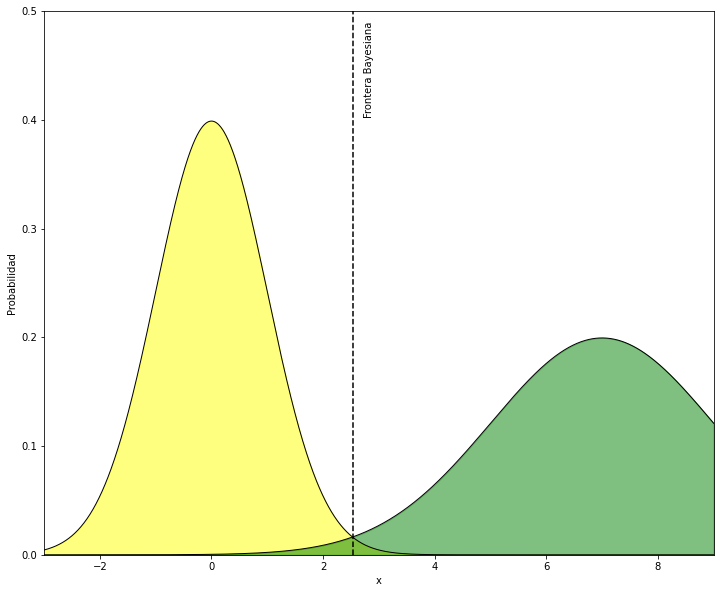

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.plot(X, f1, '-k', lw = 1) # Graficar la función de densidad de probabilidad Gaussiana 1
ax.fill_between(X, f1, color='yellow', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.plot(X, f2, '-k', lw=1) # Graficar la función de densidad de probabilidad Gaussiana 2
ax.fill_between(X, f2, color='green', alpha=0.5) # Rellena con un color el área bajo la curva de una función
ax.set_xlim(-3, 9)
ax.set_ylim(0, 0.5)
ax.plot([Frontera_Bayesiana, Frontera_Bayesiana], [0, 0.5], '--k') # Cuando f1 y f2 son iguales, se establece la frontera de decisión
ax.text(Frontera_Bayesiana + 0.2, 0.49, "Frontera Bayesiana", ha='left', va='top', rotation = 90)
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

### Clasificación biclase o binaria

En este apartado, vamos a analizar como se genera una clasificación biclase o binaria, es decir, cuando hay solo dos etiquetas en el vector de clases. Primero, vamos a definir el concepto de clasificación:

El problema de **clasificación** se asume un vector de clases disponible para generar clasificadores a través del entrenamiento y se asigna una etiqueta de la clase a un nuevo dato (llamado **dato de prueba**), el cual no tiene una etiqueta o clase.

Antes de aplicar la clasificación:

$$\mathbf{X_{Prueba}} = \begin{bmatrix} x_{1,1} & \ldots & x_{1,d} & \ldots  & x_{1,D}\\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{m,1} & \ldots & x_{m,d} & \ldots & x_{M,D} \\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{M,1} & \ldots & x_{M,d} & \ldots & x_{M,D} \end{bmatrix}$$

Después de aplicar la clasificación (cada muestra o vector de datos de prueba se relaciona con una clase)

$$\mathbf{X_{Prueba}} = \begin{bmatrix} x_{1,1} & \ldots & x_{1,d} & \ldots  & x_{1,D}\\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{m,1} & \ldots & x_{m,d} & \ldots & x_{M,D} \\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{M,1} & \ldots & x_{M,d} & \ldots & x_{M,D} \end{bmatrix} \begin{bmatrix} C_{1} \\ \vdots \\ C_{k} \\ \vdots\\
C_{N}\end{bmatrix} $$

donde $x_{m,d}$ es un dato de prueba entre una muestra $m$ y un descriptor o característica $d$; $M$ es el número de muestras de los datos de prueba.

Lo anterior se puede interpretar a través de un gráfico donde tenemos datos de dos características, circulos de color azul y negro, donde incialmente no están clasificados. Cuando se aplica la clasificación, se genera una linea que divide en dos clases los datos de prueba. En este caso, la línea divisora se genera en la frontera entre ambas características. Por esta razón, la clasificación busca crear una **es una frontera (como la Frontera Bayesiana visto en la anterior subsección)** en el espacio de características.

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Supervisado.jpg" width="1500"/>
</div>

Para encontrar la **frontera que mejor se ajuste a los datos**, se debe crear un modelo matemático y parametrizado que ayude a definir la mejor clasificación de los datos. Por esta razón, se han propuesto una familia de algoritmos y métodos para solucionar este tipo de problema.

Cuando se aplica un algoritmo supervisado, hay varias hipótesis que se pueden generar de acuerdo a los datos y el objetivo que se desea alcanzar:

1) ¿Cómo establecer la mejor frontera?

2) ¿Necesito más datos para mejorar el modelo?

3) ¿Debo conocer la distribución de los datos o inicio desde las muestras de los datos?

4) ¿Hay una frontera específica que permita llegar a la frontera natural de los datos?

5) ¿Hay métricas o métodos que permitan evaluar el desempeño del modelo con nuevos datos?

Vamos a responder a estas interrogantes en esta sesión y en los siguientes notebooks.

Antes de crear los modelos de clasificación biclase, vamos a realizar una exploración de datos y posteriormente, una partición de datos en entrenamiento y prueba.

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/phoneme.dat"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Esimportante codificarlo a utf-8
display(data.head(20))

,Aa,Ao,Dcl,Iy,Sh,Class
0,1.24,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.3,1.041,0.559,0
3,0.279,0.99,2.555,-0.738,0.0,0
4,0.307,1.272,2.656,-0.946,-0.467,0
5,0.96,0.712,-0.143,0.091,-0.061,0
6,2.941,0.657,1.493,-0.331,-0.123,0
7,0.401,1.159,2.064,-0.69,-0.308,0
8,0.229,1.748,0.634,0.259,0.0,0
9,0.303,0.609,0.474,1.427,-0.811,1


In [ ]:
data[' Class'].value_counts() # Se observa la cantidad de elementos que pertenece a cada clase

0    3818
1    1586
Name:  Class, dtype: int64

In [ ]:
X = data[['Aa',' Ao', ' Dcl', ' Iy', ' Sh']] # Características
Y = data[' Class'] # Clases

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aa      5404 non-null   object
 1    Ao     5404 non-null   object
 2    Dcl    5404 non-null   object
 3    Iy     5404 non-null   object
 4    Sh     5404 non-null   object
dtypes: object(5)
memory usage: 211.2+ KB


In [ ]:
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aa      5404 non-null   float64
 1    Ao     5404 non-null   float64
 2    Dcl    5404 non-null   float64
 3    Iy     5404 non-null   float64
 4    Sh     5404 non-null   float64
dtypes: float64(5)
memory usage: 211.2 KB


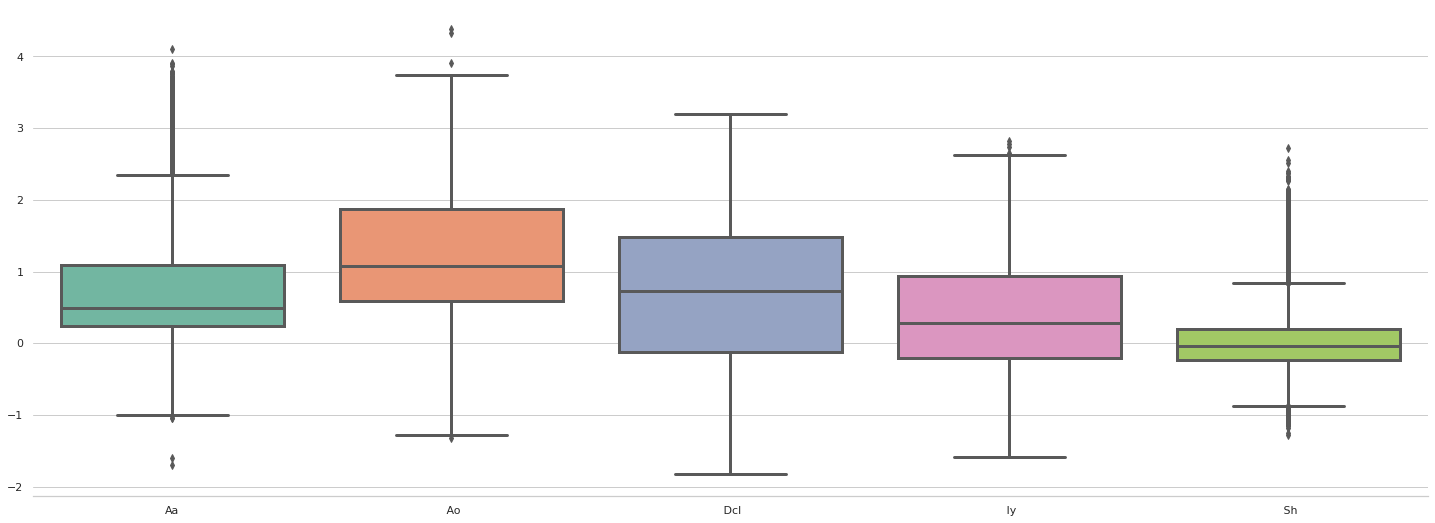

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = X, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean') 
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(X) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por 
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(X), dtype = int) 
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Número de muestras o filas con datos atípicos: ", n_errors)

Número de muestras o filas con datos atípicos:  271


In [ ]:
pos_outliers = np.where(Filtrado == -1)
pos_s = pd.DataFrame(pos_outliers)
IQR = iqr(X, axis = 0, rng = (25, 75), interpolation = 'midpoint')
print(IQR)

[0.846  1.2705 1.599  1.142  0.429 ]


In [ ]:
Q1 = np.percentile(X, 25, axis = 0, interpolation = 'midpoint')
Q3 = np.percentile(X, 75, axis = 0, interpolation = 'midpoint')

Min_Limite = Q1 - 1.5*IQR
Max_Limite = Q3 + 1.5*IQR

print("Límites inferiores = ", Min_Limite)
print("\n")
print("Límites superiores = ", Max_Limite)

Límites inferiores =  [-1.0255  -1.30975 -2.5135  -1.918   -0.876  ]


Límites superiores =  [2.3585  3.77225 3.8825  2.65    0.84   ]


In [ ]:
Datos_taponados_N = X.copy()

D1 = np.where(Datos_taponados_N.loc[pos_outliers,'Aa'] > Max_Limite[0], Max_Limite[0],
                                np.where(Datos_taponados_N.loc[pos_outliers,'Aa'] < Min_Limite[0], Min_Limite[0], 
                                         Datos_taponados_N.loc[pos_outliers,'Aa']))

D2 = np.where(Datos_taponados_N.loc[pos_outliers,' Ao'] > Max_Limite[1], Max_Limite[1],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Ao'] < Min_Limite[1], Min_Limite[1], 
                                         Datos_taponados_N.loc[pos_outliers,' Ao']))

D3 = np.where(Datos_taponados_N.loc[pos_outliers,' Dcl'] > Max_Limite[2], Max_Limite[2],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Dcl'] < Min_Limite[2], Min_Limite[2], 
                                         Datos_taponados_N.loc[pos_outliers,' Dcl']))

D4 = np.where(Datos_taponados_N.loc[pos_outliers,' Iy'] > Max_Limite[3], Max_Limite[3],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Iy'] < Min_Limite[3], Min_Limite[3], 
                                         Datos_taponados_N.loc[pos_outliers,' Iy']))

D5 = np.where(Datos_taponados_N.loc[pos_outliers,' Sh'] > Max_Limite[4], Max_Limite[4],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Sh'] < Min_Limite[4], Min_Limite[4], 
                                         Datos_taponados_N.loc[pos_outliers,' Sh']))

concatenar = np.vstack([pos_s, D1, D2, D3, D4, D5]).transpose()
concatenar = pd.DataFrame(concatenar, index = None, columns = ['pos','Aa',' Ao', ' Dcl', ' Iy', ' Sh'])
concatenar['pos'] = concatenar['pos'].astype(int)
concatenar.set_index(['pos'], inplace=True)
concatenar.index.name = None
display(concatenar)

,Aa,Ao,Dcl,Iy,Sh
83,0.832,2.711,-0.639,0.381,0.000
85,0.341,1.007,2.908,-0.772,0.391
94,1.752,1.470,1.261,-0.437,0.648
100,1.371,1.441,-0.287,0.167,-0.171
105,1.956,1.328,0.820,0.451,-0.256
...,...,...,...,...,...
5347,-0.125,1.264,1.453,0.575,0.000
5365,0.471,0.782,0.408,1.563,-0.553
5369,0.636,1.279,-0.573,-0.331,-0.269
5371,1.443,1.953,0.700,0.559,0.000


In [ ]:
Datos_taponados_N.iloc[pos_outliers] = concatenar.loc[pos_outliers] # Reemplazamos los nuevos valores

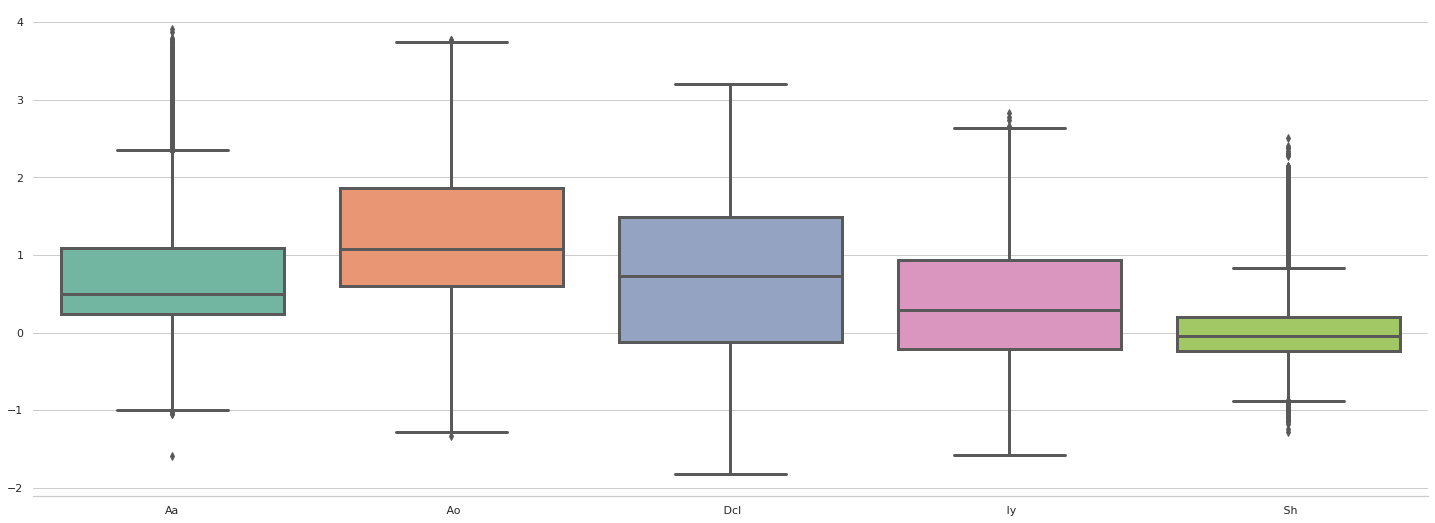

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_taponados_N, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [ ]:
MM = MinMaxScaler()
columnas = Datos_taponados_N.columns
X_Norm = MM.fit_transform(Datos_taponados_N.values)
X_Norm = pd.DataFrame(X_Norm, columns = columnas)

In [ ]:
X_Norm_Train, X_Norm_Test, Y_Train, Y_Test = train_test_split(X_Norm, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", X_Norm_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Norm_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (3782, 5)
Tamaño de los Datos de Validación =  (1622, 5)
Tamaño del Vector de Clases de Entrenamiento =  (3782,)
Tamaño del Vector de Clases de Prueba =  (1622,)


In [ ]:
X_Norm_Train.to_excel("X_Norm_Train.xlsx")
X_Norm_Test.to_excel("X_Norm_Test.xlsx")
Y_Train.to_excel("Y_Train.xlsx")
Y_Test.to_excel("Y_Test.xlsx")

#### Algoritmo 1: Análisis Discriminante Lineal y Cuadrático (LDA y QDA)

**Análisis Discriminante:** Es una técnica que busca las mejores fronteras de decisión de acuerdo a una regla de clasificación de datos. Por lo general, el análisis discriminante estima las probabilidades posteriores de la pertenencia a una clase o etiqueta, es decir, cuál es la probabilidad de una muestra de los datos, $x_n = \lbrace x_{1,1}, \ldots, x_{n,d}, \ldots, x_{n,D} \rbrace$, pertenecen a una clase o etiqueta, $K$, donde $K = \lbrace 0, 1, 2, ...\rbrace$.

NOTA: $D$ es considerado como el número de dimensiones de los datos. Se utilizará para facilitar la explicación.

Para establecer dicha probabilidad, se considera el *teorema de Bayes para clasificación*. En este caso, definimos:

$$Pr(Y = k \vert X = x) = \frac{\omega_k f_k(x)}{\sum_{i = 1}^K \omega_i f_i(x)}$$

Donde $f_k(X) \equiv Pr(X = x \vert Y = k)$ es la función de densidad de $x$ para una muestra u observación que pertenece a una variable respuesta $Y$ con una clase o etiqueta $k$; y $\omega_k$ es la probabilidad prior que es elegido aleatoriamente desde las clases o etiquetas $k$. Una forma práctica de calcular $\omega_k$, es la siguiente:

$$\omega_k = \frac{N_k}{N}$$

siendo $N_k$ el número de muestras que pertenecen a una clase $k$ y $N$ es el número de datos de entrenamiento para crear el modelo LDA.

A partir de lo anterior, vamos a explicar el análisis discriminate de una sola frontera o predictor.

Supongamos que $f_k(x)$ es una función Gaussiana tal que la función de densidad de probabilidad está dado por:

$$f_k(x) = \frac{1}{\sqrt{2\pi}\sigma_k}\exp \left \lbrack - \frac{(x - \mu_k)^2}{2\sigma_k^2} \right \rbrack$$

donde $\mu_k$ y $\sigma_k^2$ son los parámetros de media y la varianza por cada clase $k$. Considerando el teorema de Bayes para clasificación, reemplazamos $f_k(x)$:

$$p_k(x) = \frac{\omega_k \frac{1}{\sqrt{2\pi}\sigma_k}\exp \left \lbrack - \frac{(x - \mu_k)^2}{2\sigma_k^2} \right \rbrack}{\sum_{i = 1}^K \omega_i \frac{1}{\sqrt{2\pi}\sigma_i}\exp \left \lbrack - \frac{(x - \mu_i)^2}{2\sigma_i^2} \right \rbrack}$$

donde $p_k(x)$ es la probabilidad posterior que se le asigna a cada muestra con respecto a cada clase $k$. Si se aplica el logarítmo de $p_k(x)$ y organizando los términos de la función, se establece la **función discriminante**, $\delta_k (x)$, que es una función lineal de $x$:

$$ \delta_k(x) = x \left (\frac{\mu_k}{\sigma_k^2} \right) - \frac{\mu_k^2}{2\sigma_k^2} + log(\omega_k) $$

donde $\mu_k$ y $\sigma_k^2$ se calculan como:

$$\mu_k = \frac{1}{N_K} \sum_{i: y_i = k} x_i$$

$$\sigma_k^2 = \frac{1}{N - K} \sum_{k=1}^K \sum_{i: y_i = k} (x_i - \mu_k)^2$$

**Paso 1**: Creando un modelo LDA y un modelo QDA a partir de los datos y el vector de clases de entrenamiento.

In [ ]:
LDA = LinearDiscriminantAnalysis(solver = 'svd', store_covariance = True, tol = 1e-4) # svd = Singular value decomposition
LDA.fit(X_Norm_Train, Y_Train)

LinearDiscriminantAnalysis(store_covariance=True)

In [ ]:
QDA = QuadraticDiscriminantAnalysis(reg_param = 0.0001, store_covariance = True, tol = 1e-4) # svd = Singular value decomposition
QDA.fit(X_Norm_Train, Y_Train)

QuadraticDiscriminantAnalysis(reg_param=0.0001, store_covariance=True)

**Paso 2:** Se realiza la estimación de las clases a partir de los datos de validación. 

In [ ]:
Clases_LDA = LDA.predict(X_Norm_Test)
Clases_QDA = QDA.predict(X_Norm_Test)
print("Exactitud LDA = {:.4f} %".format(100*LDA.score(X_Norm_Test, Y_Test)))
print("Exactitud QDA = {:.4f} %".format(100*QDA.score(X_Norm_Test, Y_Test)))

Exactitud LDA = 76.1406 %
Exactitud QDA = 78.6067 %


Generando la gráfica de la frontera de decisión de LDA

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


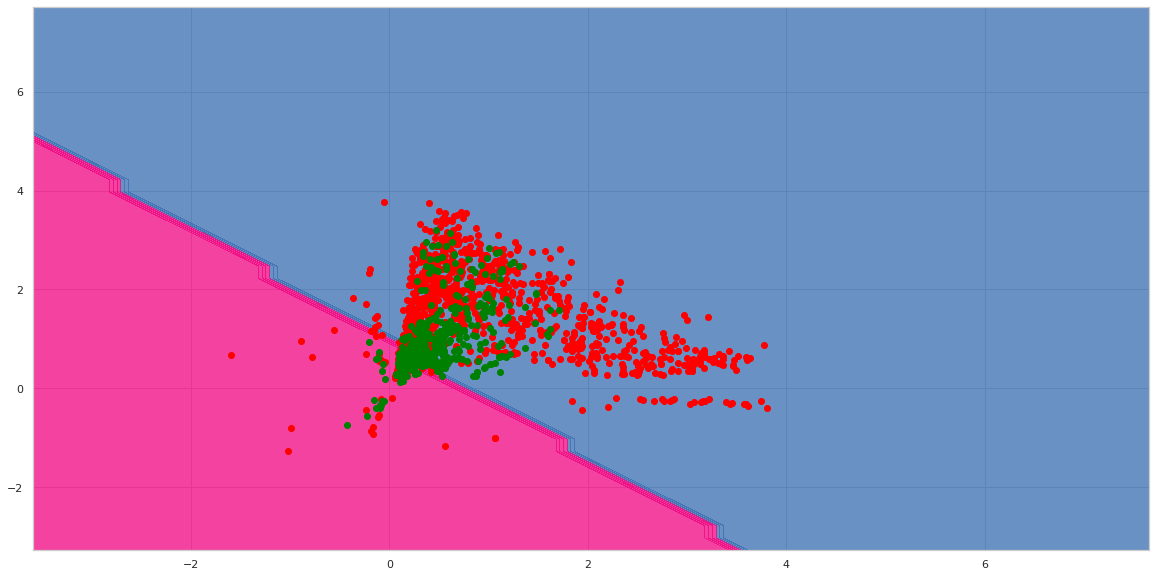

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
LDA_2 = LinearDiscriminantAnalysis(solver = 'svd', store_covariance = True, tol = 1e-4) # svd = Singular value decomposition
LDA_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_LDA = LDA_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_LDA, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


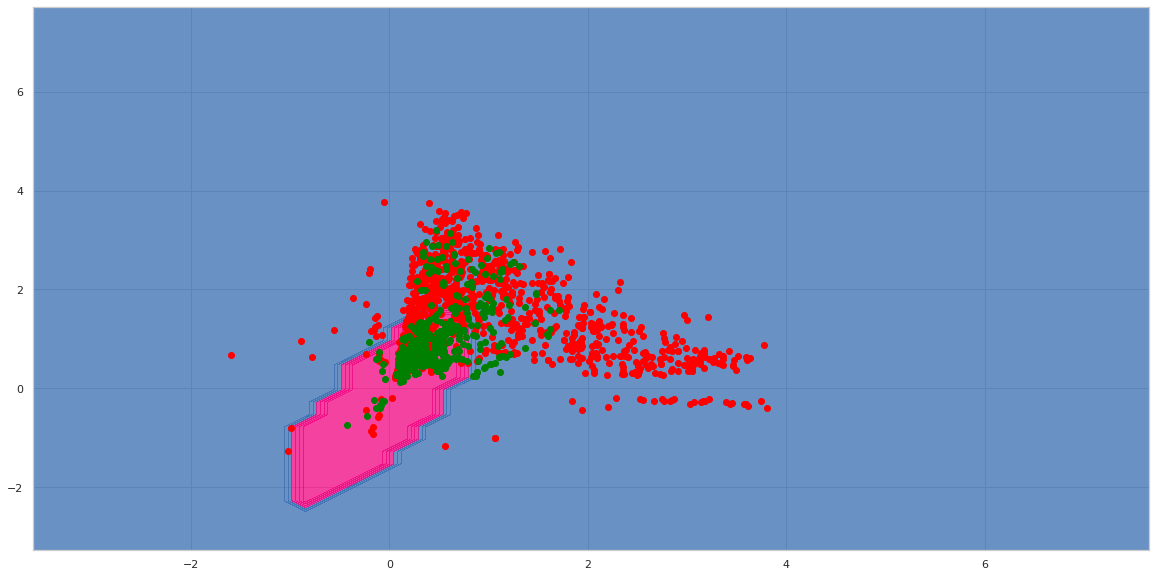

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
QDA_2 = QuadraticDiscriminantAnalysis(reg_param = 0.0001, store_covariance = True, tol = 1e-4) # svd = Singular value decomposition
QDA_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_QDA = QDA_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_QDA, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

#### Algoritmo 2: Naive Bayes

**Bernoulli Naive Bayes**: 

En esta primera propuesta, se asume que $X$ es una variable aleatoria y la probabilidad de Bernoulli, $P(X)$ puede asumir dos casos: 0 o 1:

$$P(X) = \begin{cases} a & Si\,\, X = 1 \\ b & Si\,\, X = 0\end{cases}$$

donde $a$ es un valor entre 0 y 1 y $b = 1 - a$, que es el complemento de $a$.

**Multinomial Naive Bayes:**

En esta segunda propuesta, la distribución multinomial es útil para modelar el vector de datos $x_n$ donde cada valor representa por ejemplo, el número de ocurrencias o de frecuencias relativas. Esta distribución, $P(X)$, está dado por:

$$P(X) = \frac{N!}{\prod_n x_n!} \prod_n p_{n}^{x_n}$$

donde $p_n$ es la probabilidad calculada de acuerdo al número de ocurrencias de cada vector de datos $x_n$. Es importante considerar que se recomienda usar esta propuesta con $alpha = 1$ para obtener un modelo estable y con el mejor desemepeño posible.

**Gaussian Naive Bayes:**

En esta tercera propuesta, se utiliza la función de distribución Gaussiana como probabilidad apriori, y como vimos en la teoría del estimador Bayesiano, si una función apriori es Gaussiana entonces la función aposteriori también es Gaussiana. Por lo general, se debe estimar la media y la varianza de cada vector de datos $x_n$ usando una aproximación de máxima verosimilitud para la Gaussiana (como lo vimos en una de las secciones anteriores). En este caso, se considera una verosimilitud logarítmica:

$$L(\mu; \sigma^2; x_n\vert y) = \sum_n \log P(x_n \vert y)$$

donde $P(x_n \vert y)$ es una Gaussiana.

In [ ]:
BNB = BernoulliNB()
MNB = MultinomialNB()
GNB = GaussianNB()

In [ ]:
BNB.fit(X_Norm_Train, Y_Train)
MNB.fit(X_Norm_Train, Y_Train)
GNB.fit(X_Norm_Train, Y_Train)

GaussianNB()

In [ ]:
Clases_BNB = BNB.predict(X_Norm_Test)
Clases_MNB = MNB.predict(X_Norm_Test)
Clases_GNB = GNB.predict(X_Norm_Test)
print("Exactitud BNB = {:.4f} %".format(100*BNB.score(X_Norm_Test, Y_Test)))
print("Exactitud MNB = {:.4f} %".format(100*MNB.score(X_Norm_Test, Y_Test)))
print("Exactitud GNB = {:.4f} %".format(100*GNB.score(X_Norm_Test, Y_Test)))

Exactitud BNB = 71.5166 %
Exactitud MNB = 71.5166 %
Exactitud GNB = 74.7226 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


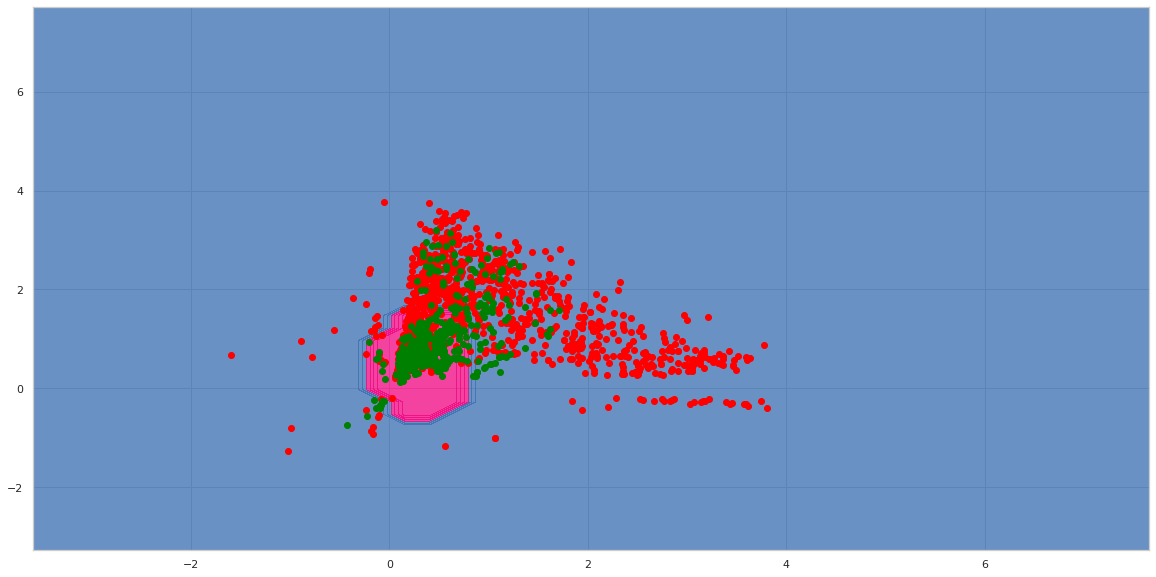

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
GNB_2 = GaussianNB()
GNB_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_GNB = GNB_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_GNB, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

#### Algoritmo 3: Árbol de Decisión

Un árbol de decisión es un modelo de clasificación y regresión que se define a partir de un orden **jerárquico o preguntas tipo Si y entonces**, generando una representación similar a un árbol. Por lo general, un árbol de decisión contiene unos nodos que representa unas respuestas (también llamado hojas) y unos nodos que hacen una pregunta tipo Si...entonces..., que permite derivar en una respuesta. Cada vez que se responde a una nueva pregunta, el árbol va aumentando el número de respuestas hasta que se cumpla con una condición de finalización de la búsqueda.

En el caso de los datos, el árbol de decisión selecciona el mejor candidato entre las características del conjunto de datos. Por lo general, la selección de la mejor característica se define a través de un **umbral de decisión**, que dependiendo de su valor, se genera una buena o mala clasificación de los datos. Matemáticamente, el umbral se define a través de una relación de un valor de decisión o umbral y una característica de los datos:

$$\sigma = <d,u_k>$$

donde $d$ es una característica o descriptor y $u_k$ es el valor de un umbral de decisión. Cuando se expresa $<d,u_k>$, significa una tupla o una *relación* entre la característica y el valor del umbral. Para que el árbol de decisión siga una ruta o nodos siguientes del árbol, es decir, Si o No, se define dos medidas:**pureza e impureza**:

**Medida de la impureza:**

$$I(M,\sigma) = \frac{N_{izquierda}}{N_{M}}I(M_{izquierda}) + \frac{N_{derecha}}{N_{M}}I(M_{derecha})$$

donde $M$ es el conjunto entero de datos de un nodo seleccionado, $M_{izquierda}$ y $M_{derecha}$ son los subconjuntos resultantes o seleccionados por el umbral de decisión, $N_M$ es el número de muestras del conjunto de datos de un nodo seleccionado, $N_{izquierda}$ y $N_{derecha}$ son los números de muestras del conjunto entero de datos seleccionados por el umbral de decisión. 

**Medida de la pureza:**

$$P(M,\sigma) = 1 - I(M,\sigma)$$

Para encontrar los mejores resultados de clasificación, se debe encontrar un valor de impureza muy bajo, es decir, que el árbol contenga la menor cantidad de impurezas residuales en sus nodos de tal forma que el árbol busque **la ruta más corta** entre los datos y los resultados de la clasificación.

**Indice de Impureza de los datos mal clasificados:**

La impúreza de los datos mal clasificados es un indice que relaciona la probabilidad de un indice o nodo, $i$, con respecto a una clase $j$, $p(i\vert j)$, y el máximo valor de pureza de la clasificación. 

$$I_{mal\, clasificados}(j) = 1 - \max(p(i\vert j))$$

Si el máximo valor de probabilidad es 1, se garantiza la mejor clasificación porque $I_{mal\, clasificados}(j) = 0$. Sin embargo, si $I_{mal\, clasificados}(j) = 1$, significa que el modelo realizó una mala clasficación y por consiguiente, el modelo presenta underfitting o sin entrenamiento.

**Importancia de las características:**

Se mencionó anteriormente que el árbol de decisión elige la mejor característica de acuerdo a un umbral de decisión. Sin embargo, uno se pregunta cómo realiza la selección. La respuesta se encuentra en un medida llamada **importancia de las características**, el cual ayuda a reducir la cantidad de impurezas del árbol.

$$Importancia(x_d) = \sum_{m=1}^M \frac{N_m}{N} \Delta I_{x_d}$$

**Indice de impureza basado en la medida de entropía de Gini:**

Este índice mide la probabilidad de una mala clasificación si una clase o etiqueta es seleccionado aleatoriamente, usando la distribución de probabilidad de bifurcación o del paso de un nodo a otro nodo del árbol. Si este indice alcanza un valor cercano a 0, significa que todas las muestras de un nodo están clasificados dentro de una simple clase. 

$$I_{GINI} (j) = \sum_{i=1}^N \lbrack p(i \vert j)\cdot (1 - p(i \vert j)) \rbrack$$

Para conocer más sobre la entropía de Gini, ir a: https://www.youtube.com/watch?v=2lEcfRuHFV4

**Indice de impureza basado en la medida de entropía cruzada:**

Este indice esta basado en la teoría de la información donde las muestras pertenecen a un clase o etiqueta a partir de la cantidad de información que ofrece cada una de las clases. Por lo general, si el valor de este indice es máximo, significa que las muestras se asocian a una distribución uniforme entre clases o etiquetas. Lo anterior es el peor resultado que puede mostrar un árbol de decisión debido a que el árbol debe tomar muchas decisiones redundantes que aportan poca información relevante de la clasificación. En cambio, si el valor del índice es cercano a 0, significa que el árbol tomará pocas decisiones pero con información relevante de las clases o etiquetas, mejorando la calidad de la clasificación. 

$$I_{entropia\, cruzada} (j) = - \sum_{i=1}^N p(i \vert j) \cdot \log p(i \vert j)$$

Para tener una idea general sobre la teoría de la información, ir a: https://www.youtube.com/watch?v=9r7FIXEAGvs

Para conocer más sobre el concepto de la entropía cruzada, ir a: https://www.youtube.com/watch?v=tRsSi_sqXjI

**Notas**  
- Si las impuresas son altas, es necesario seguir ramificando
- Dicha impureza viene dada por la entropía
- Cuando hay mucha ramificación, se da un overfitting (sobreentrenamiento)

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
print(Number_Muestras_por_Clase)

0    2658
1    1124
Name:  Class, dtype: int64


In [ ]:
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)
print(Peso_por_Clase)

0    0.711437
1    1.682384
Name:  Class, dtype: float64


In [ ]:
Modelo_Arbol_1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 3, 
                                        min_samples_leaf = 2, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})

Modelo_Arbol_2 = DecisionTreeClassifier(criterion = "gini", max_depth = 6, min_samples_split = 3, 
                                        min_samples_leaf = 2, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})

In [ ]:
Modelo_Arbol_1.fit(X_Norm_Train, Y_Train)
Modelo_Arbol_2.fit(X_Norm_Train, Y_Train)

DecisionTreeClassifier(class_weight={0: 0.7114371708051166,
                                     1: 1.6823843416370108},
                       max_depth=6, min_samples_leaf=2, min_samples_split=3)

In [ ]:
coef_1 = Modelo_Arbol_1.feature_importances_
coef_2 = Modelo_Arbol_2.feature_importances_

Caracteristicas = X_Norm_Train.columns

importancia_1 = pd.DataFrame(coef_1, index = Caracteristicas, columns = ['Puntaje con Impureza de Entropía Cruzada'])
importancia_ordenada_1 = importancia_1.sort_values(by = ['Puntaje con Impureza de Entropía Cruzada'])
display(importancia_ordenada_1)

importancia_2 = pd.DataFrame(coef_2, index = Caracteristicas, columns = ['Puntaje con Impureza de Entropía Gini'])
importancia_ordenada_2 = importancia_2.sort_values(by = ['Puntaje con Impureza de Entropía Gini'])
display(importancia_ordenada_2)

,Puntaje con Impureza de Entropía Cruzada
Sh,0.044275
Ao,0.101243
Dcl,0.121221
Aa,0.225161
Iy,0.508100


,Puntaje con Impureza de Entropía Gini
Sh,0.041996
Ao,0.086855
Dcl,0.114690
Aa,0.198631
Iy,0.557829


En estas tablas, la característica ly tiene mayor importancia con respecto a las demás características. Por consiguiente, el árbol de decisión va a considerar dicha característica como la más relevante para la clasificación de datos.

In [ ]:
def grafica_caracteristicas_importantes(model, nombres_caracteristicas, X_Train):
    muestras, N_Caracteristicas = X_Train.shape
    del muestras
    fig = plt.figure(figsize=(12,8))
    plt.barh(range(N_Caracteristicas), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(N_Caracteristicas), nombres_caracteristicas)
    plt.xlabel("Importancia de las características")
    plt.ylabel("Características")
    plt.show()

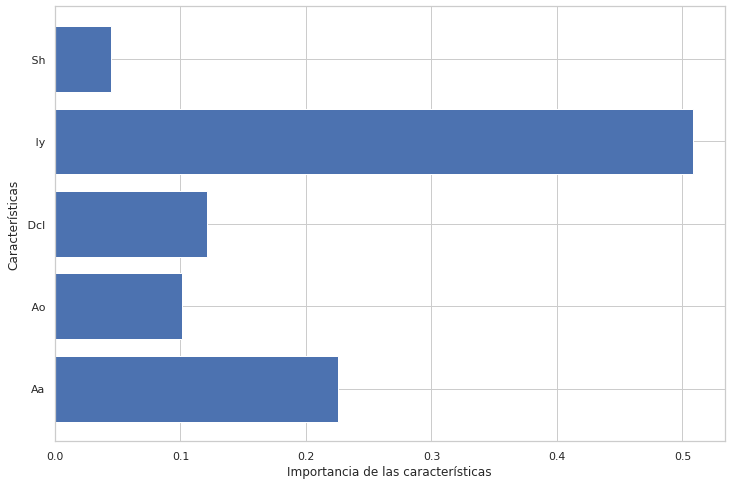

In [ ]:
grafica_caracteristicas_importantes(Modelo_Arbol_1, Caracteristicas, X_Norm_Train)

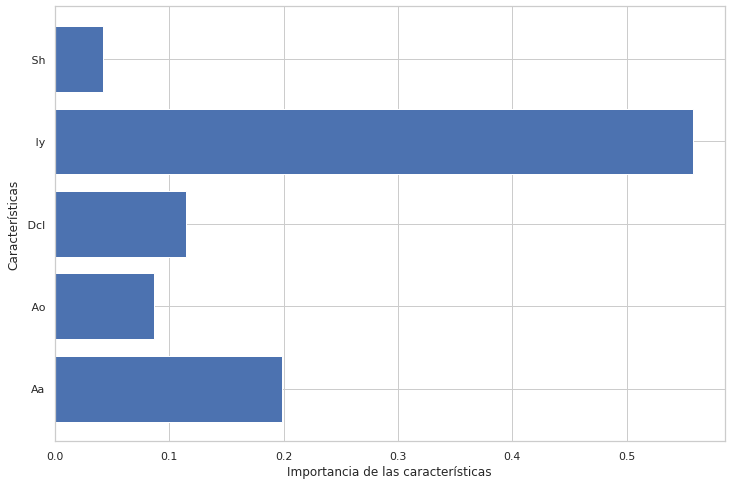

In [ ]:
grafica_caracteristicas_importantes(Modelo_Arbol_2, Caracteristicas, X_Norm_Train)

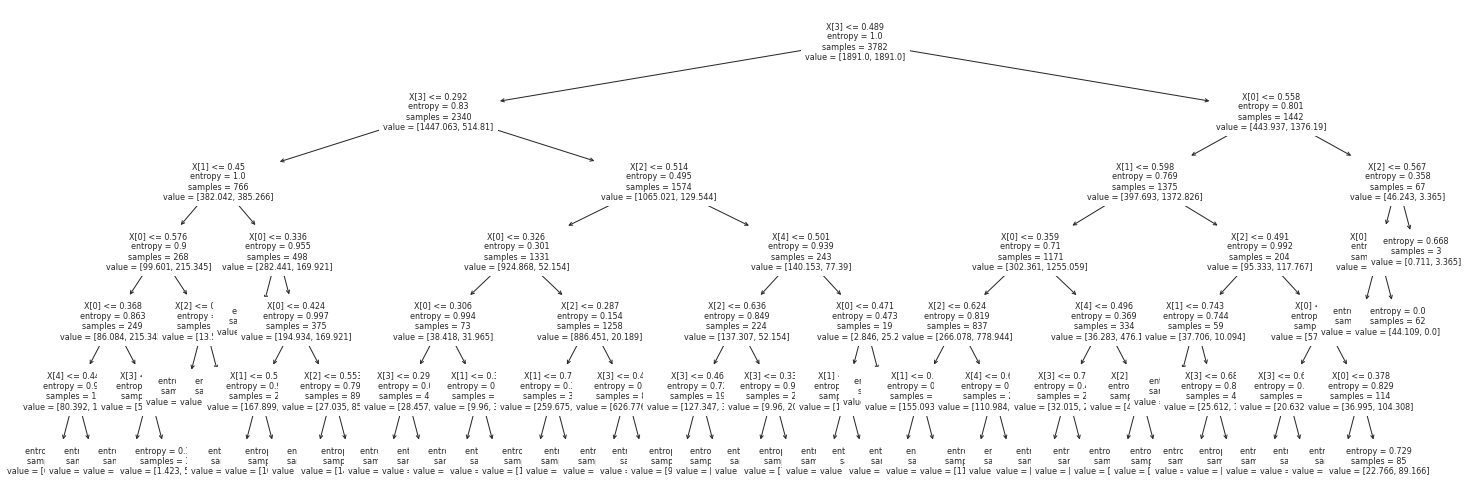

In [ ]:
plot_tree(Modelo_Arbol_1, fontsize = 8)
plt.show()

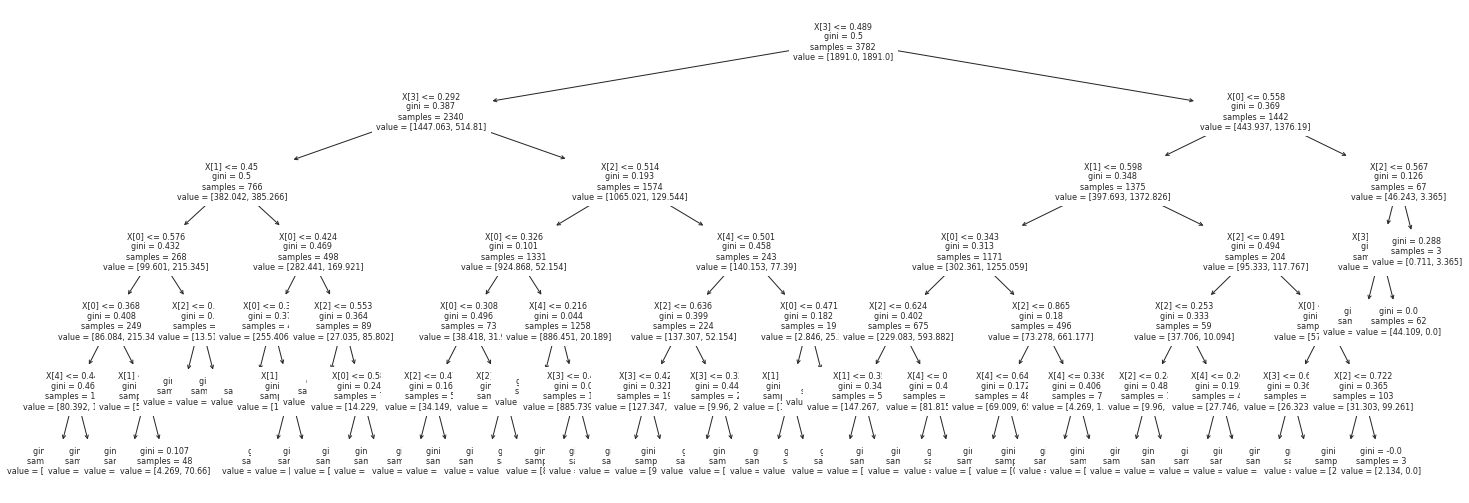

In [ ]:
plot_tree(Modelo_Arbol_2, fontsize = 8)
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals
  warn(msg.format(cls.__name__), PlotnineWarning)


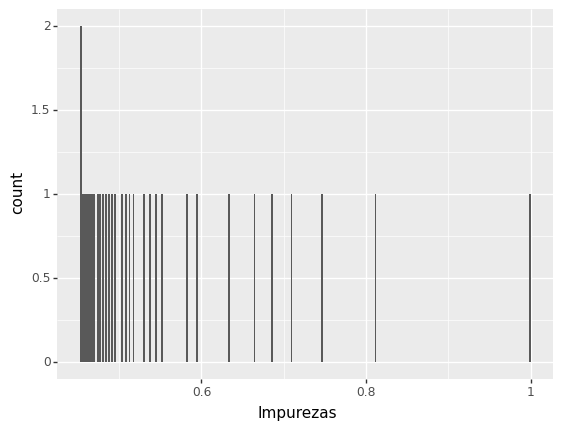

<ggplot: (8759129712353)>

In [ ]:
Pesos = X_Norm_Train.mean(axis = 1)
Costo_Impureza_1 = Modelo_Arbol_1.cost_complexity_pruning_path(X_Norm_Train, Y_Train, sample_weight = Pesos)
ggplot(pd.DataFrame(Costo_Impureza_1['impurities'], columns = ['Impurezas'])) + aes(x = "Impurezas") +  geom_bar(width=0.002)

/usr/local/lib/python3.7/dist-packages/plotnine/positions/position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals
  warn(msg.format(cls.__name__), PlotnineWarning)


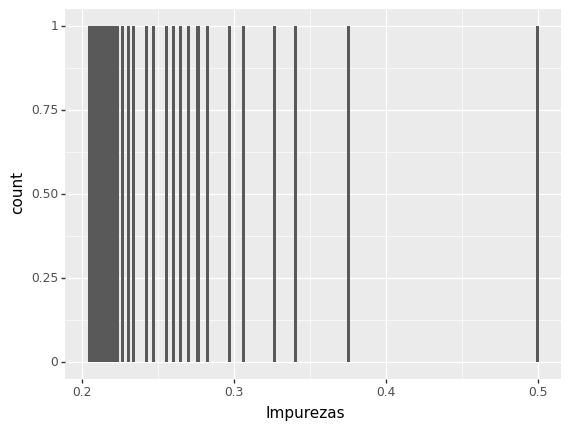

<ggplot: (8759129729701)>

In [ ]:
Costo_Impureza_2 = Modelo_Arbol_2.cost_complexity_pruning_path(X_Norm_Train, Y_Train, sample_weight = Pesos)
ggplot(pd.DataFrame(Costo_Impureza_2['impurities'], columns = ['Impurezas'])) + aes(x = "Impurezas") +  geom_bar(width=0.002)

Hay menos impurezas en el modelo 2 con impreza Gini con respecto al modelo 1 con imoureza de entropía cruzada. Por consiguiente, el modelo 2 es menos propenso a un sobreajuste u overfitting.

In [ ]:
Clases_Arbo_1 = Modelo_Arbol_1.predict(X_Norm_Test)
Clases_Arbo_2 = Modelo_Arbol_2.predict(X_Norm_Test)

print("Exactitud Árbol 1 = {:.4f} %".format(100*Modelo_Arbol_1.score(X_Norm_Test, Y_Test)))
print("Exactitud Árbol 2 = {:.4f} %".format(100*Modelo_Arbol_2.score(X_Norm_Test, Y_Test)))

Exactitud Árbol 1 = 75.9556 %
Exactitud Árbol 2 = 78.0518 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


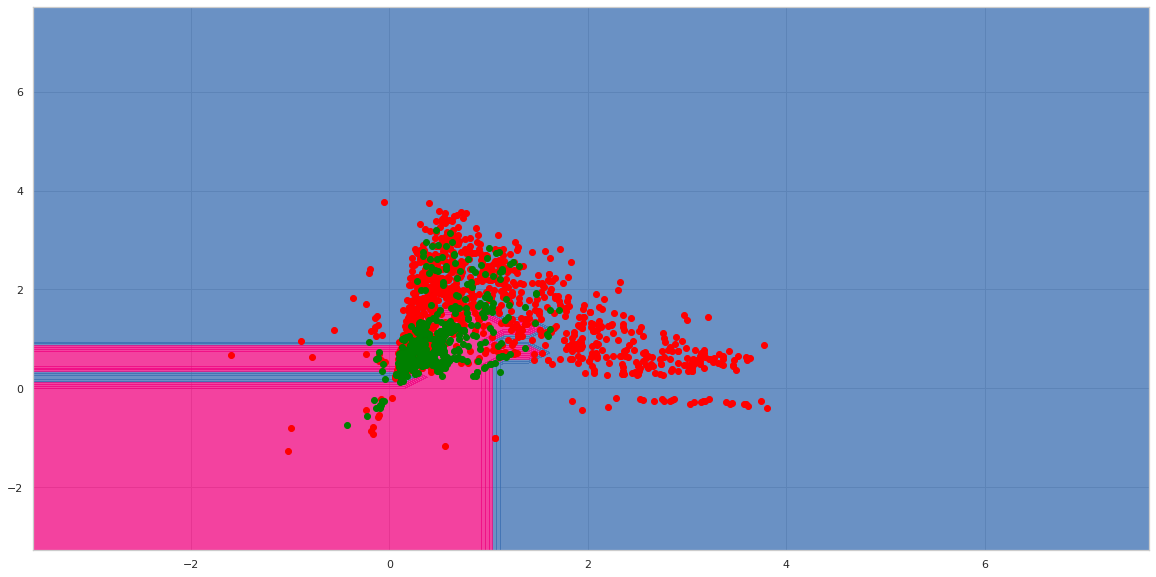

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
Arbol_2 = DecisionTreeClassifier(criterion = "gini", max_depth = 6, min_samples_split = 3, 
                                        min_samples_leaf = 2, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})
Arbol_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_Arbol_2 = Arbol_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_Arbol_2, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

#### Algoritmo 4: Regresión Logística

Aunque este método tiene nombre de regresión, en realidad es un algoritmo de clasificación en el cual esta basado en la probabilidad para que una muestra pertenezca a una clase. Las probabilidades deben ser continuas en un espacio de los números reales $\mathcal{R}$ y definirse con valores entre 0 y 1. La regresión logística considera una **función de umbral** para filtrar aquellas muestras que tienen menor y mayor valor probabilidad. Usualmente, la función de umbral que utiliza dicho método es la **función sigmoidal o logística**, expresado como:

$$\sigma(x;\omega) = \frac{1}{1 + \exp(-x\cdot \omega)}$$

donde $\omega$ es un vector de pesos.


In [ ]:
def modelo_logistico(x):
    return 1 / (1 + np.exp(-x))

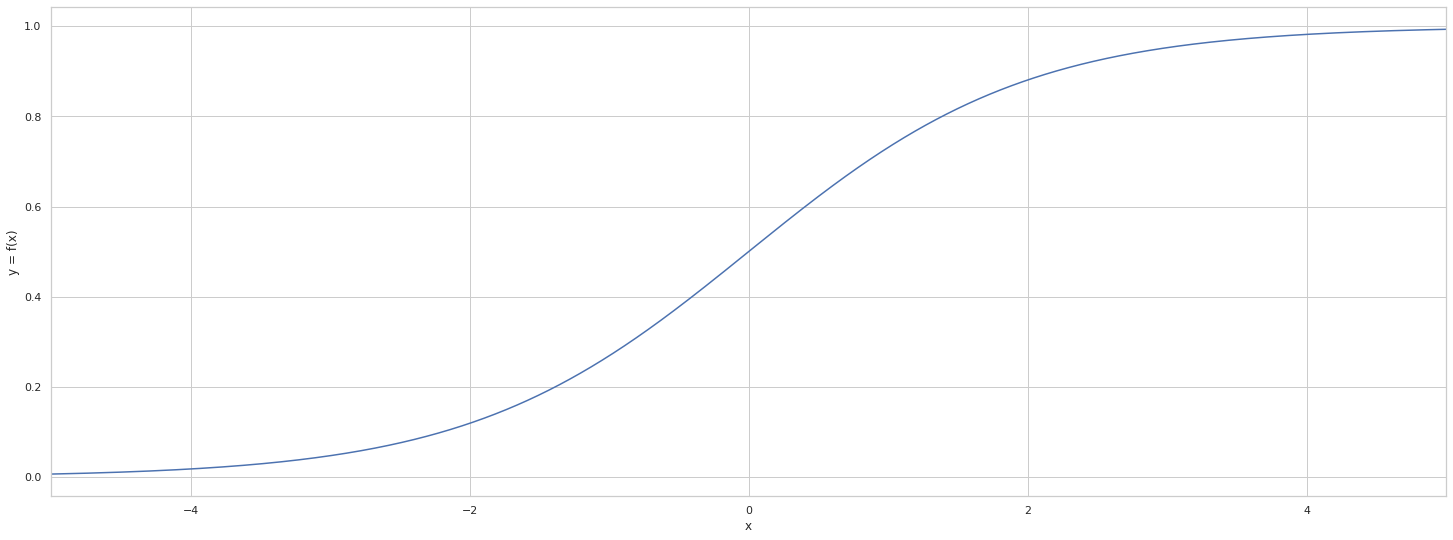

In [ ]:
x = np.linspace(-5,5,50000)
y = modelo_logistico(x)

plt.plot(x, y, label="Regresión Logistica")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.xlim((-5, 5))
plt.show()

Considerando la función sigmoidal, se define la probabilidad para que una muestra pertenezca a una clase, $P(y\vert x) = \omega(x;\omega)$, donde $y$ es un vector de clases o etiquetas. Para encontrar los parámetros óptimos de este modelo, se define una función de verosimilitud logarítmica para la salida o etiqueta o clase:

$$L(\omega,y) = \log P(y\vert \omega) = \sum_i \log P(y_i \vert x_i, \omega)$$

A partir de la anterior función, la regresión logística resuelve un **problema de optimización** en el cual se minimiza una función de pérdida:

$$J(\omega) = - \sum_i \log P(y\vert \omega) = - \sum_i (y_i \log \sigma (x_i\cdot \omega_i) + (1 - y_i)\log(1 - \sigma(x_i\cdot \omega_i)))$$

Esta función de pérdida esta definida desde el punto de vista de la **teoría de la información**, donde se define la medida de entropía cruzada de una distribución de probabilidad.

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)

In [ ]:
Modelo_Logistico_1 = LogisticRegression(tol = 1e-5, C = 5, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]},
                                        solver = 'lbfgs', max_iter = 1000)

Modelo_Logistico_2 = LogisticRegression(tol = 1e-5, C = 0.01, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]},
                                        solver = 'newton-cg', max_iter = 1000)

In [ ]:
Modelo_Logistico_1.fit(X_Norm_Train, Y_Train)
Modelo_Logistico_2.fit(X_Norm_Train, Y_Train)

LogisticRegression(C=0.01,
                   class_weight={0: 0.7114371708051166, 1: 1.6823843416370108},
                   max_iter=1000, solver='newton-cg', tol=1e-05)

In [ ]:
Clases_LR_1 = Modelo_Logistico_1.predict(X_Norm_Test)
Clases_LR_2 = Modelo_Logistico_2.predict(X_Norm_Test)

print("Exactitud LR 1 = {:.4f} %".format(100*Modelo_Logistico_1.score(X_Norm_Test, Y_Test)))
print("Exactitud LR 2 = {:.4f} %".format(100*Modelo_Logistico_2.score(X_Norm_Test, Y_Test)))

Exactitud LR 1 = 71.8249 %
Exactitud LR 2 = 72.5647 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


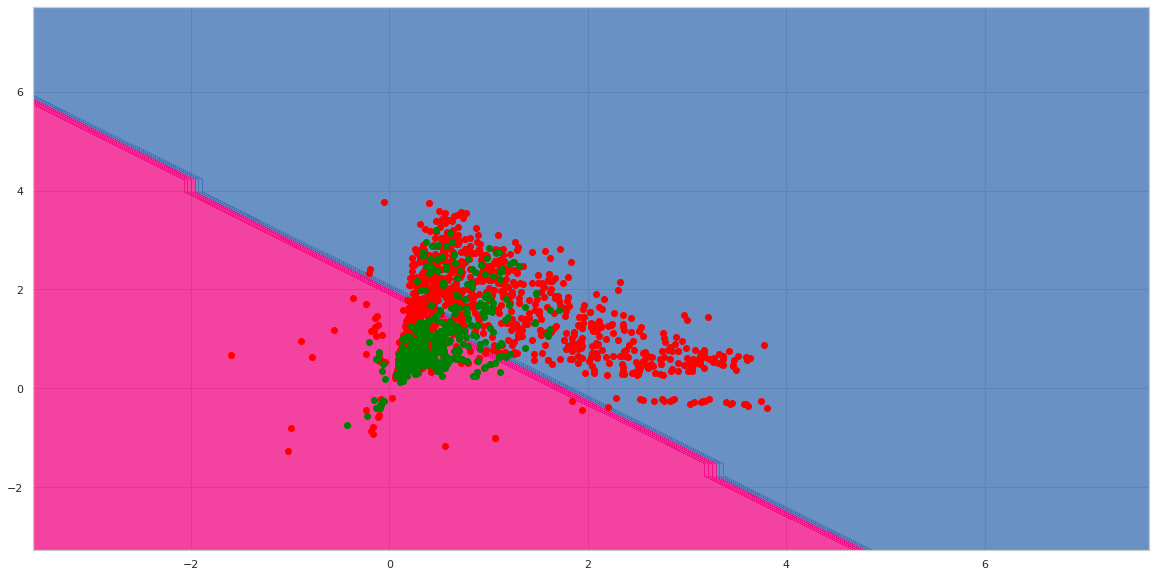

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
LR_2 = LogisticRegression(tol = 1e-5, C = 0.01, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]},
                                        solver = 'newton-cg', max_iter = 1000)
LR_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_LR_2 = LR_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_LR_2, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

#### Algoritmo 5: Máquina de Soporte Vectorial (SVM) 

SVM es un algoritmo de aprendizaje supervisado usado para clasificación o regresión, aunque es más usado para problemas de clasificación. Por lo general, SVM divide los datos a partir de modelos lineales o no-lineales en un **hiperplano**, que separa los datos y se etiquetan en clases o etiquetas.

**Hiperplano:** Es algún subespacio de una dimensión definido por un espacio vectorial dado por una transformación matemática. 

**Vectores de soporte:** son las coordenadas de las observaciones individuales del espacio de caracteísticas de un conjunto de datos.

**Función Kernel:** Es una transformación de dos puntos ubicados en el espacio de características. Por ejemplo, una transformación básica es la función Kernel lineal, el cual es el producto interno entre dos vectores:

$$K(x_i, x_j) = < \phi(x_i)^T \phi(x_j) >$$

donde $K(x_i, x_j)$ es una función Kernel entre dos puntos, $x_i, x_j$, $\phi(x_i)$ y $\phi(x_j)$ son dos vectores proyectados que representan la transformación de dos vectores de características.

Gráficamente, la máquina de soporte vectorial puede generar hiperplanos que separan los datos de dos características en dos clases (o biclase), donde la línea negra gruesa es la separación original del hiperplano (lo que llamabamos frontera Bayesiana) y las lineas negras delgadas son dos vectores de soporte que separan los datos en dos clases.

<div>
<img src="https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Hiperplano.jpg" width="1500"/>
</div>


donde $w^T x + b $ es un función lineal que separa dos conjuntos de datos en un hiperplano o también llamado vectores de soporte; $w$ es un vector normal diferente a 0 que son pesos y $b$ es un valor escalar que es el punto de intersección con una característica.

Cuando $w^T x + b = 0$ se encuentra la frontera natural de separación de los datos pero en la vida real, las clases se separan normalmente en dos fronteras donde unos pocos elementos pueden estar en medio de los dos vectores de soporte (esos pocos elementos mencionados generan el error de clasificación). Los dos vectores de soporte que generan dos hiperplanos, $w^T x + b = -1$ y $w^T x + b = 1$, tratan de maximizar la separación entre ellas para que las dos clases sean bien definidas y evitar errores de elementos mal clasificados. Esta separación se mide por una distancia $d(x_1, x_2)$. Es importante considerar que $w^T x + b = -1$ y $w^T x + b = 1$ representa -1 y 1 como dos etiquetas o clases, que representan los **clasificadores**:

$$y = f(x) = sgn(w^T + b)$$

donde $sgn(\cdot)$ es una función signo, que puede ser positivo o negativo.

Considerando las características básicas de la máquina de soporte vectorial, hay dos modelos de optimización que se deben resolver de acuerdo al tipo de caso: separables o no separables.

**Caso separable:**

Este caso se utiliza cuando la separación de los datos es linealmente separable, es decir, $y_i(w^T \cdot x_i + b) \geq 1$:

$$L(w, b, \alpha) = \frac{1}{2} w^T w - \sum_{i=1}^m \alpha_i \lbrack y_i(w^T \cdot x_i + b) - 1 \rbrack$$

Sujeto a:

$\alpha_i \geq 0$ donde $i \in \lbrack 1, m\rbrack$

$\sum_{i=1}^m \alpha_i \cdot y_i = 0$

donde $\alpha$ es una variable Lagrangiana ($\alpha_i \geq 0$) donde $i \in \lbrack 1, m\rbrack$, siendo $m$ un número de restricciones del modelo de optimización. Para resolver este tipo de problema, se utilizan los **multiplicadores de Lagrange**, en el cual permiten encontrar los coeficientes apropiados de $\alpha_i$ que **minimizan la función de pérdida** $L(w, b, \alpha)$

Para mayor información sobre los multiplicadores de Lagrange, ir a la url: https://www.youtube.com/watch?v=5w-b1yU9hy4

**Caso no separable:**

Este caso se utiliza cuando la separación de los datos no es linealmente separable, es decir, $y_i(w^T \cdot x_i + b) \ngeq 1$:

$$\min_{w,b,\zeta} \frac{1}{2} w^T w + C \sum_{i=1}^m \zeta_i$$

Sujeto a:

$y_i(w^T \cdot x_i + b) \geq 1 - \zeta_i$

donde $\zeta$ es llamado **variable de pila** que es usado en optimización para definir versiones flexibles de algunas restriciones del modelo, permitiendo crear un margen flexible de algunos vectores de soporte que pertenecen a una clase que puede también encontrarse en la parte opuesta del hiperplano y que podría ser incluidos en el modelo de entrenamiento del algoritmo; $C$ es un parámetro de validación cruzada usado para selección de características de acuerdo al número de folds o doblajes visto en el caso de la regresión.

La función de costo para el caso no separable se puede extender como:

$$L(w, b, \zeta, \alpha, \beta) = \frac{1}{2} w^T w + C \sum_{i=1}^m \zeta_i - \sum_{i=1}^m \alpha_i \lbrack y_i(w^T \cdot x_i + b) - 1 + \zeta_i \rbrack - \sum_{i=1}^m \beta_i \cdot \zeta_i$$

donde $\beta$ es otra variable Lagrangiana que se utiliza para asociar las restricciones no negativas de $\zeta$. Al igual que en el caso seprable, se debe **minimizan la función de pérdida**.

A partir de este contexto general de la máquina de soporte vectorial, vamos a mirar varios ejemplos de clasificación de acuerdo al tipo de problema y función kernel.

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)

In [ ]:
Modelo_SVM_Lineal = LinearSVC(tol = 1e-5, C = 0.5, multi_class = 'ovr', 
                              max_iter = 2000, intercept_scaling = 1, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})

In [ ]:
Modelo_SVM_Lineal.fit(X_Norm_Train, Y_Train)

LinearSVC(C=0.5, class_weight={0: 0.7114371708051166, 1: 1.6823843416370108},
          max_iter=2000, tol=1e-05)

In [ ]:
Clases_Lineal_SVM = Modelo_SVM_Lineal.predict(X_Norm_Test)
print("Exactitud SVM Lineal = {:.4f} %".format(100*Modelo_SVM_Lineal.score(X_Norm_Test, Y_Test)))

Exactitud SVM Lineal = 71.5783 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


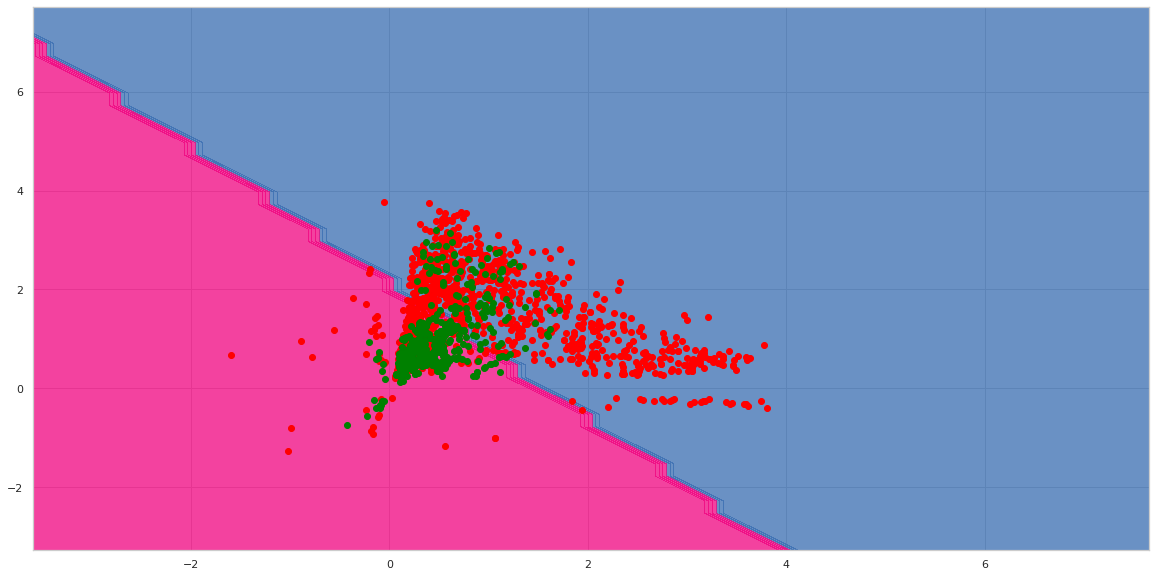

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
SVM_Lineal = LinearSVC(tol = 1e-5, C = 0.5, multi_class = 'ovr', 
                              max_iter = 2000, intercept_scaling = 1, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]})
SVM_Lineal.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_SVMLIneal = SVM_Lineal.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_SVMLIneal, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

La **función Kernel base radial** esta basado en la función Gaussiana, expresado como:

$$K(x_i, x_j) = \exp(-\gamma \cdot \vert x_i - x_j \vert ^2)$$

donde $\gamma$ es un parámetro que determina la amplitud de la función que **no** influencia la dirección de los vectores de soporte pero si **genera cambios** en la distancia de separación entre dos vectores de soporte.

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)

In [ ]:
Modelo_SVM_RBF = SVC(C = 0.2, kernel = 'rbf', gamma = 'scale', shrinking=True, 
                    tol = 1e-4, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]}, 
                    max_iter = 10000, decision_function_shape = 'ovr', break_ties=False, random_state=None)

# OJO, break_ties=False se usa si es un problema biclase; si break_ties=True, el problema es multiclase
# OJO, decision_function_shape = 'ovr' se utiliza para resolver un problema biclase. Si
# decision_function_shape = 'ovo', que es one vs one, se utiliza para resolver un problema multiclase.

In [ ]:
Modelo_SVM_RBF.fit(X_Norm_Train, Y_Train)

SVC(C=0.2, class_weight={0: 0.7114371708051166, 1: 1.6823843416370108},
    max_iter=10000, tol=0.0001)

In [ ]:
Clases_RBF_SVM = Modelo_SVM_RBF.predict(X_Norm_Test)
print("Exactitud SVM RBF = {:.4f} %".format(100*Modelo_SVM_RBF.score(X_Norm_Test, Y_Test)))

Exactitud SVM RBF = 78.9766 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


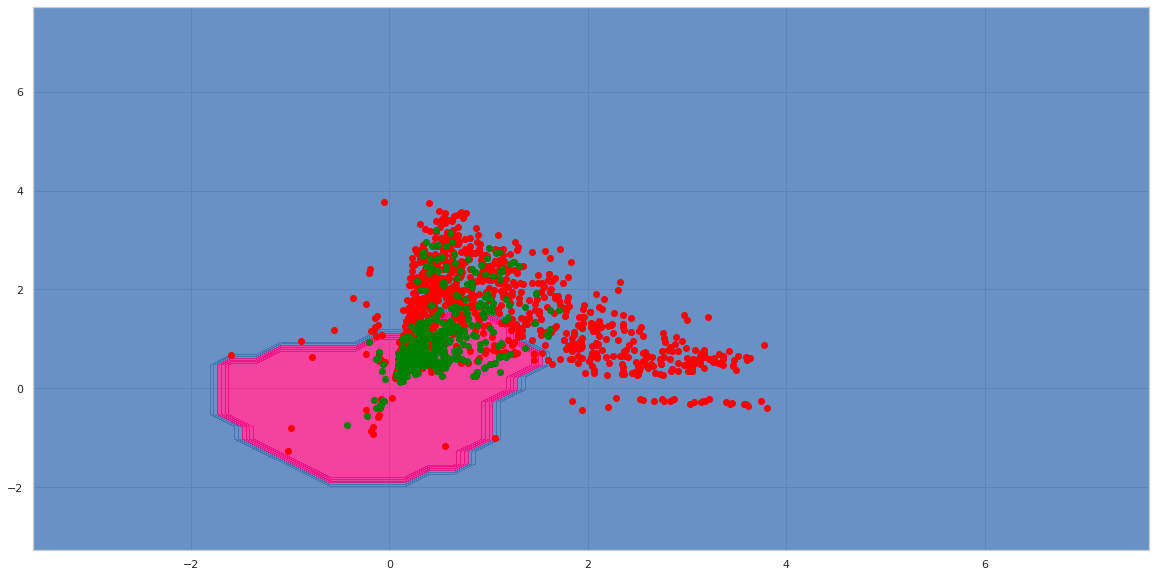

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
Modelo_SVM_RBF_2 = SVC(C = 0.2, kernel = 'rbf', gamma = 'scale', shrinking=True, 
                    tol = 1e-4, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]}, 
                    max_iter = 10000, decision_function_shape = 'ovr', break_ties=False, random_state=None)

Modelo_SVM_RBF_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_SVM_RBF = Modelo_SVM_RBF_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_SVM_RBF, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

La **función Kernel polinómico** esta basado en un arreglo de polinomial de $d$- grados, expresado como:

$$K(x_i, x_j) = (\gamma\cdot x_i^T\cdot x_j + r)^d$$

donde $d$ es un parámetro que define el grado del polinimio ($d$ debe ser un número entero desde 1 hasta $D$ grados polinomiales); $\gamma$ es un parámetro que define la amplitud de la función y $r$ es un término constante que acompaña a la función polinómica. Una característica particular de esta función es que puede expandir la dimensionalidad con un número grande de variables de soporte, ideal para resolver problemas de clasificación con datos que tienen comportamiento no-lineal. No obstante, para resolver este tipo de problema, se requiere de un mayor poder de cómputo para encontrar el modelo.

In [ ]:
Number_Muestras_por_Clase = Y_Train.value_counts()
Numero_de_Clases = len(Number_Muestras_por_Clase.index)
Peso_por_Clase = len(Y_Train)/(Numero_de_Clases*Number_Muestras_por_Clase)

In [ ]:
Modelo_SVM_Poly = SVC(C = 0.1, kernel = 'poly', degree = 3, coef0 = 10, gamma = 'scale', shrinking=True, 
                    tol = 1e-3, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]}, 
                    max_iter = 1000000, decision_function_shape = 'ovr', break_ties=False, random_state=None)

# OJO, break_ties=False se usa si es un problema biclase; si break_ties=True, el problema es multiclase
# OJO, decision_function_shape = 'ovr' se utiliza para resolver un problema biclase. Si
# decision_function_shape = 'ovo', que es one vs one, se utiliza para resolver un problema multiclase.

In [ ]:
Modelo_SVM_Poly.fit(X_Norm_Train,Y_Train)

SVC(C=0.1, class_weight={0: 0.7114371708051166, 1: 1.6823843416370108},
    coef0=10, kernel='poly', max_iter=1000000)

In [ ]:
Clases_Poly_SVM = Modelo_SVM_Poly.predict(X_Norm_Test)
print("Exactitud SVM Poly  = {:.4f} %".format(100*Modelo_SVM_Poly.score(X_Norm_Test, Y_Test)))

Exactitud SVM Poly  = 80.0247 %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


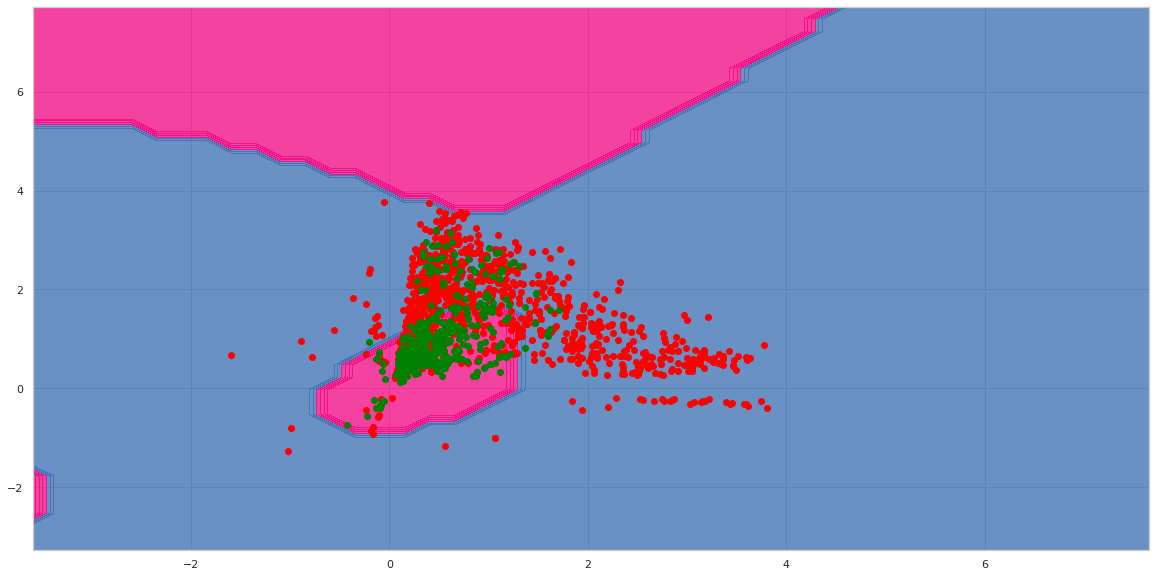

In [ ]:
MM = MinMaxScaler()
X_Norm_2 = MM.fit_transform(Datos_taponados_N.iloc[:,0:2])
X_Norm_2 = pd.DataFrame(X_Norm_2, columns = ['Aa','Ao'])
X_Norm_2_Train, X_Norm_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_Norm_2, Y, test_size = 0.3, train_size = 0.7, random_state = 17)
Modelo_SVM_Poly_2 = SVC(C = 0.1, kernel = 'poly', degree = 3, coef0 = 10, gamma = 'scale', shrinking=True, 
                    tol = 1e-3, class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]}, 
                    max_iter = 1000000, decision_function_shape = 'ovr', break_ties=False, random_state=None)

Modelo_SVM_Poly_2.fit(X_Norm_2_Train, Y_2_Train)

X_set, y_set = MM.inverse_transform(X_Norm_2_Test), Y_2_Test

# Definir las fronteras
min1, max1 = X_set[:, 0].min() - 2, X_set[:, 0].max() + 4 # Aa
min2, max2 = X_set[:, 1].min() - 2, X_set[:, 1].max() + 4 # Ao

# Escalando los datos
x_scale, y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#Generando una rejilla de las características Aa y Ao
X1, X2 = np.meshgrid(x_scale, y_scale)
X_flatten = np.array([X1.ravel(), X2.ravel()])

X_transformado = MM.transform(X_flatten.T)
Clases_2_SVM_Poly = Modelo_SVM_Poly_2.predict(X_transformado).reshape(X1.shape)

plt.figure(figsize=(20,10))

# Graficando el contorno
plt.contourf(X1, X2, Clases_2_SVM_Poly, alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i),label = j)

plt.show()

#### Caso Especial de la Máquina Soporte Vectorial: One-Class SVM

En el algoritmo SVM, se pensaba inicialmente que resolvía problemas de clasificación de datos o inclusive, problemas de regresión. Sin embargo, los vectores de soporte permiten detectar datos atípicos, mediante una función Kernel Lineal o no Lineal. Este descubrimiento se propuso a inicios del siglo XXI por Bernhard Schölkopf, John C. Platt, John Shawe-Taylor, Alex J. Smola y Robert C. Williamson, quienes demostraron que la estimación de los vectores de soporte en una distribución de alta dimensionalidad permite diferenciar los datos atípicos con respecto a los datos no atípicos. 

Veamos un ejemplo de uso con los datos de este notebook.

In [ ]:
One_SVM = OneClassSVM(kernel='rbf',gamma='scale', tol = 1e-4, nu = 0.5, shrinking=True, max_iter = 10000)

# nu = es una fracción de los datos de entrenamiento para calcular el límite máximo y mínimo que permitirá diferenciar 
# los datos atípicos.

In [ ]:
Filtrado = One_SVM.fit_predict(X) # Se realiza la predicción de los datos atípicos
print(Filtrado) # Si es -1, es una muestra con algunos datos atípicos

[ 1  1  1 ... -1 -1  1]


Número de muestras con datos atípicos =  2701


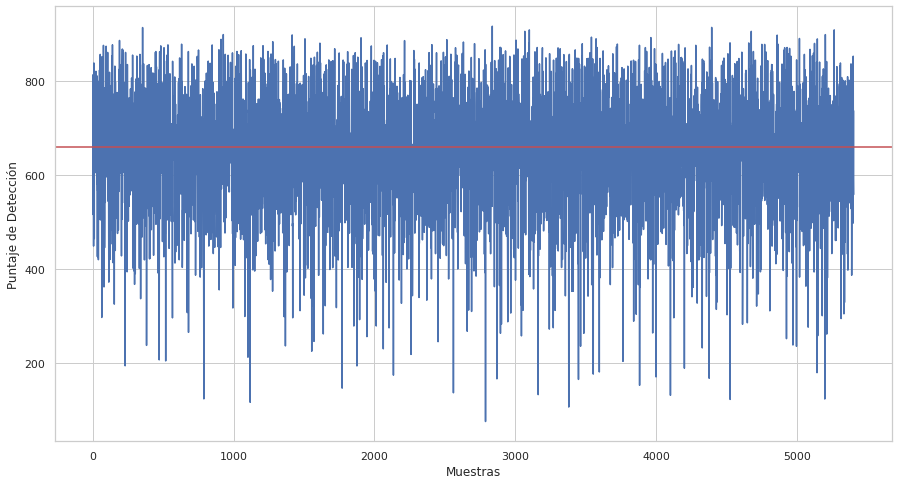

In [ ]:
Puntajes = One_SVM.score_samples(X) # Puntajes para diferenciar datos atípicos
Umbral = One_SVM.offset_
pos = np.where(Filtrado != 1)
pos = pd.DataFrame(pos)

print("Número de muestras con datos atípicos = ", pos.shape[1])

plt.figure(figsize=(15,8))
plt.plot(np.arange(0,Puntajes.shape[0],1), Puntajes)
plt.axhline(Umbral, color = 'r')
plt.xlabel('Muestras')
plt.ylabel('Puntaje de Detección')
plt.show()

In [ ]:
pos_outliers = np.where(Filtrado == -1)
pos_s = pd.DataFrame(pos_outliers)
IQR = iqr(X, axis = 0, rng = (25, 75), interpolation = 'midpoint')
print(IQR)

[0.846  1.2705 1.599  1.142  0.429 ]


In [ ]:
Q1 = np.percentile(X, 25, axis = 0, interpolation = 'midpoint')
Q3 = np.percentile(X, 75, axis = 0, interpolation = 'midpoint')

Min_Limite = Q1 - 1.5*IQR
Max_Limite = Q3 + 1.5*IQR

print("Límites inferiores = ", Min_Limite)
print("\n")
print("Límites superiores = ", Max_Limite)

Límites inferiores =  [-1.0255  -1.30975 -2.5135  -1.918   -0.876  ]


Límites superiores =  [2.3585  3.77225 3.8825  2.65    0.84   ]


In [ ]:
Datos_taponados_N = X.copy()

Aa = np.where(Datos_taponados_N.loc[pos_outliers,'Aa'] > Max_Limite[0], Max_Limite[0],
                                np.where(Datos_taponados_N.loc[pos_outliers,'Aa'] < Min_Limite[0], Min_Limite[0], 
                                         Datos_taponados_N.loc[pos_outliers,'Aa']))

Ao = np.where(Datos_taponados_N.loc[pos_outliers,' Ao'] > Max_Limite[1], Max_Limite[1],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Ao'] < Min_Limite[1], Min_Limite[1], 
                                         Datos_taponados_N.loc[pos_outliers,' Ao']))

Dcl = np.where(Datos_taponados_N.loc[pos_outliers,' Dcl'] > Max_Limite[2], Max_Limite[2],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Dcl'] < Min_Limite[2], Min_Limite[2], 
                                         Datos_taponados_N.loc[pos_outliers,' Dcl']))

Iy = np.where(Datos_taponados_N.loc[pos_outliers,' Iy'] > Max_Limite[3], Max_Limite[3],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Iy'] < Min_Limite[3], Min_Limite[3], 
                                         Datos_taponados_N.loc[pos_outliers,' Iy']))

Sh = np.where(Datos_taponados_N.loc[pos_outliers,' Sh'] > Max_Limite[4], Max_Limite[4],
                                np.where(Datos_taponados_N.loc[pos_outliers,' Sh'] < Min_Limite[3], Min_Limite[4], 
                                         Datos_taponados_N.loc[pos_outliers,' Sh']))

concatenar = np.vstack([pos_s, Aa, Ao, Dcl,	Iy,	Sh]).transpose()
concatenar = pd.DataFrame(concatenar, index = None, columns = ['pos', 'Aa',	'Ao',	'Dcl',	'Iy',	'Sh'])
concatenar['pos'] = concatenar['pos'].astype(int)
concatenar.set_index(['pos'], inplace=True)
concatenar.index.name = None
display(concatenar)

,Aa,Ao,Dcl,Iy,Sh
3,0.2790,0.990,2.555,-0.738,0.000
4,0.3070,1.272,2.656,-0.946,-0.467
6,2.3585,0.657,1.493,-0.331,-0.123
9,0.3030,0.609,0.474,1.427,-0.811
11,0.6550,1.054,1.372,-0.724,0.840
...,...,...,...,...,...
5395,0.6530,1.061,2.321,1.546,-0.401
5398,0.8830,1.942,-0.443,1.609,-0.483
5399,0.2540,2.392,0.689,1.828,-0.544
5401,1.0310,0.584,1.866,1.532,-0.671


In [ ]:
Datos_taponados_N.iloc[pos_outliers] = concatenar.loc[pos_outliers] # Reemplazamos los nuevos valores

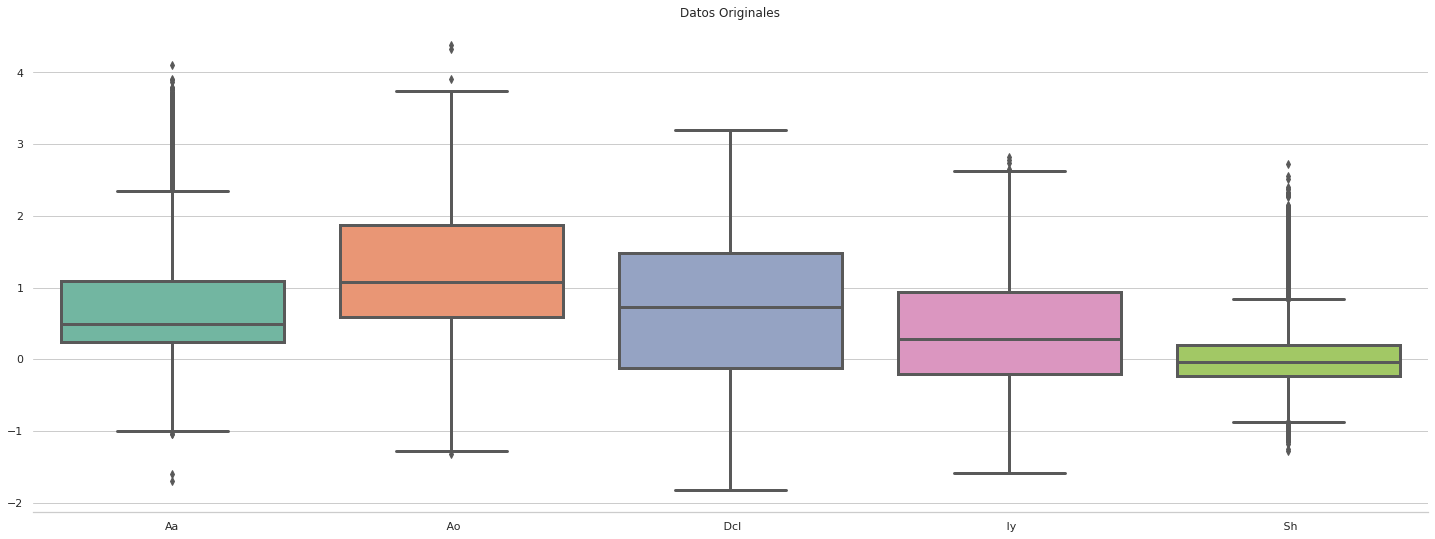

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = X, linewidth = 3, palette="Set2", fliersize = 5).set(title='Datos Originales') # Diagrama Box Plot
sns.despine(left=True)

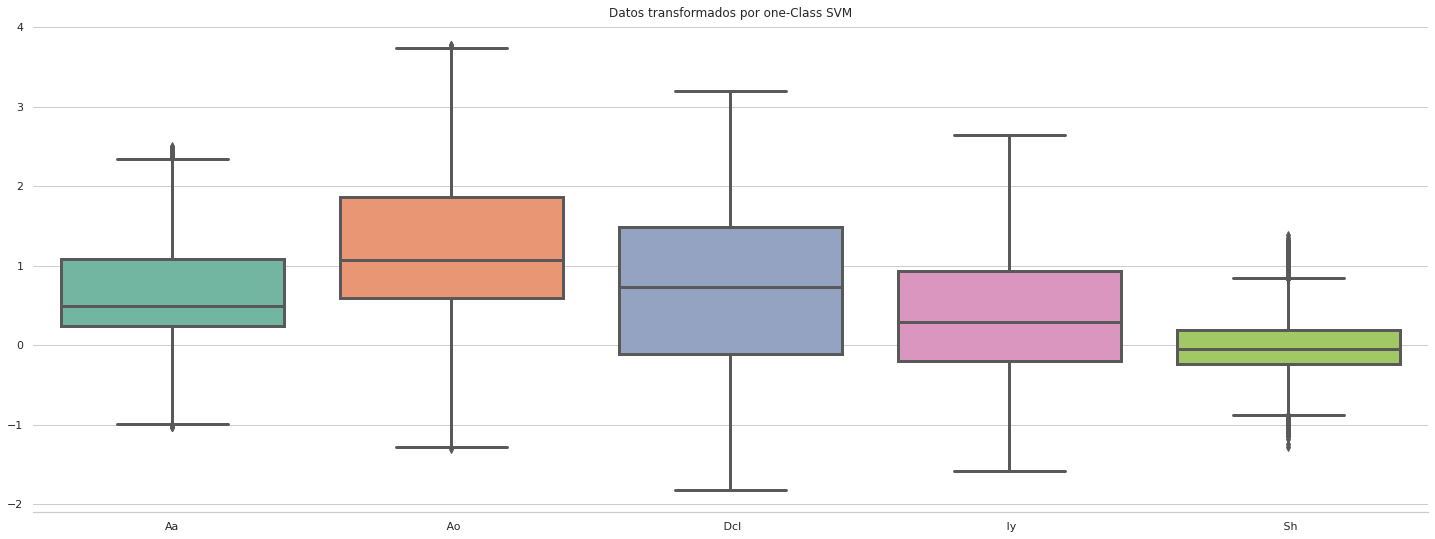

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_taponados_N, linewidth = 3, palette="Set2", fliersize = 5).set(title='Datos transformados por one-Class SVM') # Diagrama Box Plot
sns.despine(left=True)